# Import data

In [1]:
import pandas as pd
import numpy as np

sales=pd.read_csv("data/data_processed.csv")
sales

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,2018-08-27,44,20.0,53.99,42.38,43.99,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4308,2018-09-03,44,14.0,52.99,53.99,42.38,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4309,2018-09-10,44,22.0,44.99,52.99,53.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4310,2018-09-17,44,28.0,42.99,44.99,52.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0


# VII/ Extensions


## 1) Prophet
%pip install prophet

In [4]:
from prophet import Prophet
from sklearn.metrics import r2_score
import random
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, ElasticNetCV,ElasticNet
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS

### What is the Prophet method?

#### Soigmoid and Fourier series

In [5]:
C=4
k=2
m=1

In [6]:
def sigmoid(t):
  return C/(1+np.exp(-k*(t-m)))

In [7]:
df_sigmoid=pd.DataFrame()
df_sigmoid['t']=np.linspace(-2, 4, 50)
df_sigmoid['y']=df_sigmoid['t'].apply(lambda t: sigmoid(t))

In [8]:
slope=k*C/4
df_diff=pd.DataFrame()
df_diff['t']=np.linspace(m-2/k, m+2/k, 50)
df_diff['y']=df_diff['t'].apply(lambda t: C/2+slope*(t-m))

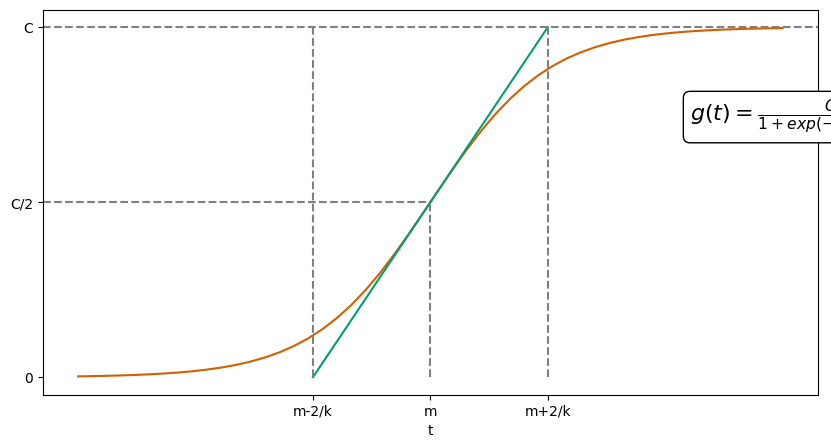

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#set parameters
plt.rcParams.update({'legend.fontsize': 20,'legend.handlelength': 2})
plt.figure(figsize=(10,5))
#plot sigmoid and tangent
plt.plot(df_sigmoid['t'],df_sigmoid['y'], color=sns.color_palette(palette='colorblind')[3])
plt.plot(df_diff['t'],df_diff['y'], color=sns.color_palette(palette='colorblind')[2])
#add lines
plt.axhline(y=C, linestyle='--', color='grey')
plt.axhline(y=C/2, xmin=0, xmax=0.5, linestyle='--', color='grey')
plt.vlines(x=[m-2/k, m+2/k], ymin=0, ymax=C, linestyle='--', color='grey')
plt.vlines(x=[m], ymin=0, ymax=C/2, linestyle='--', color='grey')
#format x-axis
plt.xlabel("t")
locs, labels=plt.xticks()
plt.xticks([m-2/k,m,m+2/k],['m-2/k',  'm',  'm+2/k'])
#format y-axis
locs, labels=plt.yticks()
y_ticks=['0',  'C/2',  'C']
plt.yticks([0,C/2,C], ['0','C/2','C'])
#add formula
plt.annotate(r'$g(t) = \frac{C}{1 + exp(-k(t-m))}  $', xy=(0.69, 0.7), xycoords='figure fraction',
             size=16, ha='left', va='top',
             bbox=dict(boxstyle='round', fc='w'))
#save fiv
plt.savefig("sigmoid.png",dpi=400)

#### Fourier series

In [10]:
df_fourier=pd.DataFrame()
df_fourier['x']=np.linspace(-10, 10, 500)
df_fourier['sin(x)']=df_fourier['x'].apply(lambda x: np.sin(x))
df_fourier['sin(2x)']=df_fourier['x'].apply(lambda x: np.sin(2*x))
df_fourier['sin(x)+sin(2x)']=df_fourier['sin(x)']+df_fourier['sin(2x)']

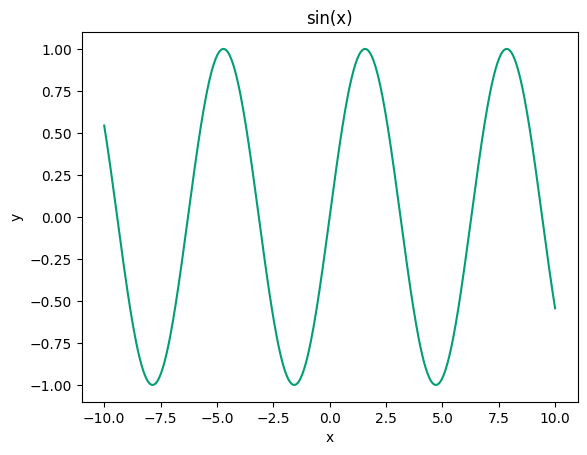

In [11]:
plt.rcParams.update({'font.size': 10})
plt.title('sin(x)')
plt.ylabel("y")
sns.lineplot(x='x', y='sin(x)', data=df_fourier, color=sns.color_palette(palette='colorblind')[2])
plt.savefig("sin(x).png",dpi=400)
plt.show()

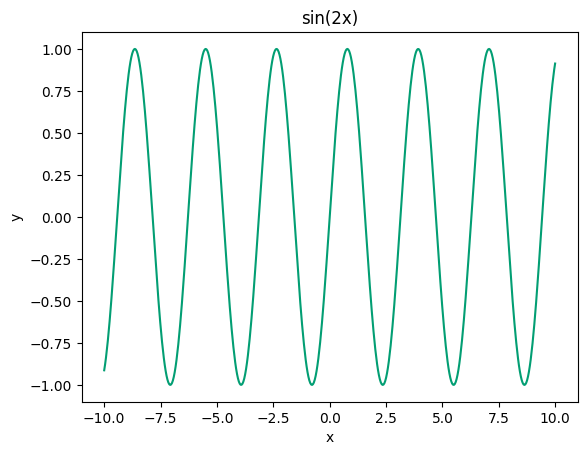

In [12]:
plt.rcParams.update({'font.size': 10})
plt.title('sin(2x)')
plt.ylabel("y")
sns.lineplot(x='x', y='sin(2x)', data=df_fourier, color=sns.color_palette(palette='colorblind')[2])
plt.savefig("sin(2x).png",dpi=400, bbox_inches='tight')
plt.show()

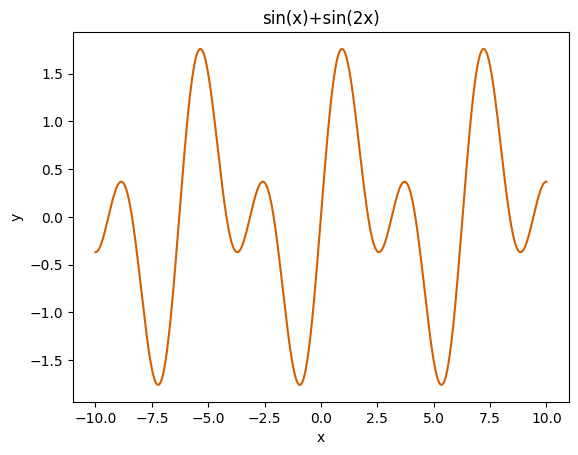

In [13]:
plt.rcParams.update({'font.size': 10})
plt.title('sin(x)+sin(2x)')
plt.ylabel("y")
sns.lineplot(x='x', y='sin(x)+sin(2x)', data=df_fourier, color=sns.color_palette(palette='colorblind')[3])
plt.savefig("sin(x)+sin(2x).png",dpi=400, bbox_inches='tight')
plt.show()

#### Prophet for item 11

In [14]:
df_11=sales[sales.sku==11]
df_11.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
980,2016-11-14,11,17.0,31.99,32.99,32.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
981,2016-11-21,11,17.0,30.99,31.99,32.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
982,2016-11-28,11,31.0,30.99,30.99,31.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
983,2016-12-05,11,19.0,30.99,30.99,30.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
984,2016-12-12,11,19.0,29.31,30.99,30.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
df_train = pd.DataFrame()
df_train['ds']=list(df_11['week'])[:68]
df_train['y']=list(df_11['weekly_sales'])[:68]
df_train.head()

,ds,y
0,2016-11-14,17.0
1,2016-11-21,17.0
2,2016-11-28,31.0
3,2016-12-05,19.0
4,2016-12-12,19.0


In [16]:
m = Prophet(yearly_seasonality=12)#, interval_width = 0.95)
m.add_country_holidays(country_name='US')
m.fit(df_train)

14:01:14 - cmdstanpy - INFO - Chain [1] start processing
14:01:16 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=30, freq = 'W')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-14,27.811602,-10.231576,65.950347,27.811602,27.811602,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.446731,0.446731,0.446731,0.0,0.0,0.0,28.258333
1,2016-11-21,28.397541,-8.364942,68.883064,28.397541,28.397541,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.504594,1.504594,1.504594,0.0,0.0,0.0,29.902135
2,2016-11-28,28.983481,-32.560133,48.233063,28.983481,28.983481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-19.804818,-19.804818,-19.804818,0.0,0.0,0.0,9.178663
3,2016-12-05,29.569420,-38.218528,37.902291,29.569420,29.569420,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-28.402772,-28.402772,-28.402772,0.0,0.0,0.0,1.166648
4,2016-12-12,30.155360,-8.812185,68.113817,30.155360,30.155360,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.743919,-1.743919,-1.743919,0.0,0.0,0.0,28.411441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2018-08-26,82.219816,18.946660,94.440812,82.219786,82.219844,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-25.682535,-25.682535,-25.682535,0.0,0.0,0.0,56.537281
94,2018-09-02,82.805748,1.110689,80.330866,82.805717,82.805778,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-40.630992,-40.630992,-40.630992,0.0,0.0,0.0,42.174756
95,2018-09-09,83.391680,31.149331,111.030291,83.391646,83.391711,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-11.123155,-11.123155,-11.123155,0.0,0.0,0.0,72.268524
96,2018-09-16,83.977612,48.505585,128.749348,83.977576,83.977645,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.566503,2.566503,2.566503,0.0,0.0,0.0,86.544115


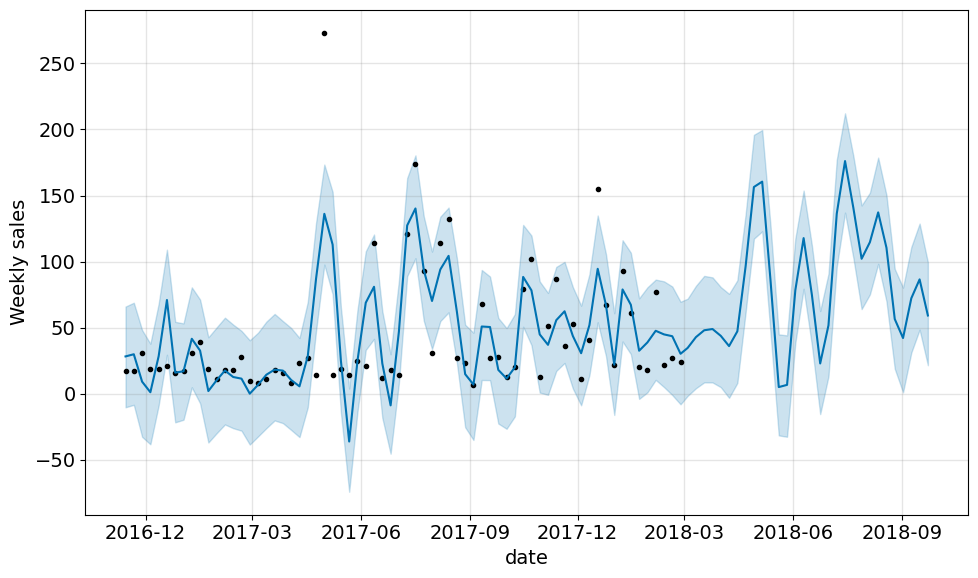

In [18]:
plt.rcParams.update({'font.size': 14})
fig1 = m.plot(forecast)
plt.xlabel("date")
plt.ylabel("Weekly sales")
plt.savefig("prophet_sku_11.png",dpi=400)

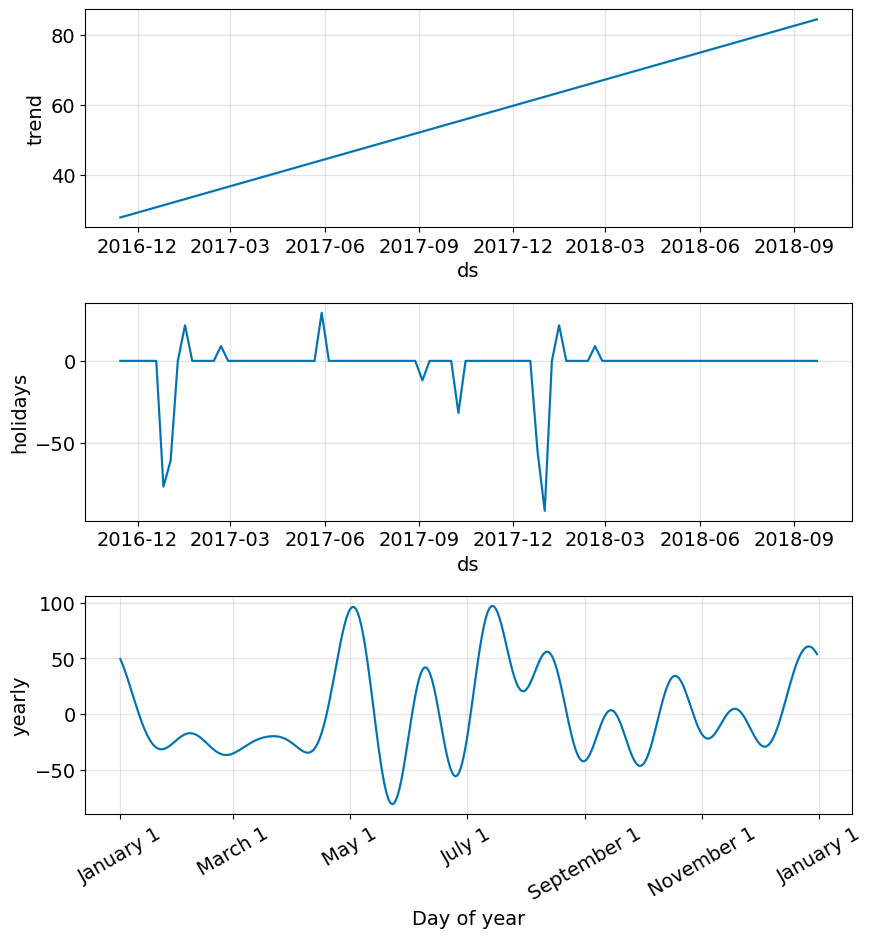

In [19]:
plt.rcParams.update({'font.size': 14})
fig2 = m.plot_components(forecast)
plt.xticks(rotation=30)
plt.savefig("prophet_elements_sku_11.png",dpi=400, bbox_inches='tight')

In [20]:
y_pred=list(forecast['yhat'][-30:])
y_pred

[34.6820634728952,
 42.85448124825862,
 48.04369570920874,
 48.99158019771339,
 43.82430223631028,
 36.07282106950333,
 47.2460715091758,
 96.54380902659321,
 156.4420303903277,
 160.5058754341808,
 86.07260265484489,
 5.063447223133281,
 6.7330579155387085,
 78.40969915037418,
 117.7661175654967,
 74.76882120452223,
 22.948728507926802,
 51.75604415372112,
 136.23468804151682,
 176.05414278010207,
 140.79066347961557,
 102.14110887124802,
 114.67563586110768,
 137.23922925789182,
 110.48391113325033,
 56.53728097343232,
 42.174755991244716,
 72.26852449725347,
 86.54411513901307,
 59.23210482196968]

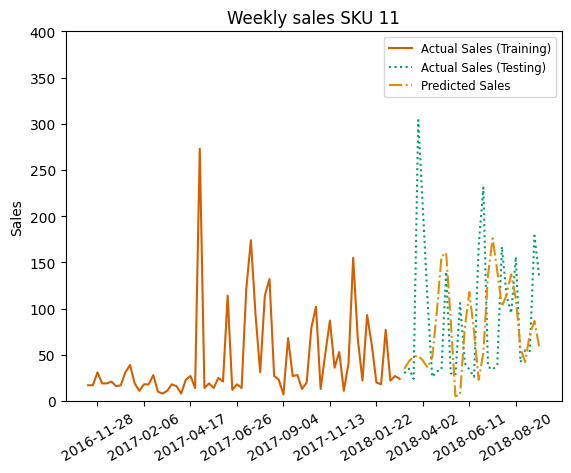

In [21]:
plt.rcParams.update({'font.size': 10})

plt.title('Weekly sales SKU 11')
plt.ylabel("Sales")

plt.plot(df_11.iloc[:68]["week"],df_11.iloc[:68]["weekly_sales"],label="Actual Sales (Training)",color=sns.color_palette(palette='colorblind')[3])
plt.plot(df_11.iloc[68:]["week"],df_11.iloc[68:]["weekly_sales"],label="Actual Sales (Testing)",color=sns.color_palette(palette='colorblind')[2],linestyle="dotted")
plt.plot(df_11.iloc[68:]["week"],y_pred,color=sns.color_palette(palette='colorblind')[1],label="Predicted Sales",linestyle='dashdot')
locs, labels=plt.xticks()
x_ticks = []
plt.xticks(locs[2::10],df_11.week[2::10], rotation=30)
plt.legend(loc='upper right',fontsize='small')
plt.ylim([0,400])

plt.savefig("prophet_sku_11_pred_vs_actual.png",dpi=400, bbox_inches='tight')
plt.show()

### Forecasting with Prophet

In [22]:
res=pd.DataFrame()

#### Univariate Time-series Forecasting

##### Choosing the right seasonality

In [23]:
df_prophet_univariate=sales[['sku','week','weekly_sales']]

skuSet = sales.sku.unique()
skuData = {}
for i in skuSet:
    df_i = df_prophet_univariate[df_prophet_univariate.sku == i]
    skuData[i] = {'X': df_i.week.values,
                  'y': df_i.weekly_sales.values}

In [24]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:

    X_train_i,X_test_i = np.split(skuData[i]["X"], [68])
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68])

    X_dict[i] = {'train': X_train_i, 'test': X_test_i}
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    y_test += list(y_test_i)
    y_train += list(y_train_i)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
## This script is pretty long to run ##

res_r2=[]

from sklearn.metrics import r2_score

for seas in range(20):

  print('\n Seasonality:',seas)

  y_pred = []
  y_prophet = []

  count=1

  for i in skuSet:
    
    #print('item:',count)
    count+=1
    df_train = pd.DataFrame()
    df_train['ds']=X_dict[i]['train']
    df_train['y']=y_dict[i]['train']

    size_pred=y_dict[i]['test'].shape[0]

    m = Prophet(yearly_seasonality=seas)
    m.add_country_holidays(country_name='US')
    m.fit(df_train)
    future = m.make_future_dataframe(periods=size_pred, freq = 'W')
    forecast = m.predict(future)

    y_pred_i=np.array(forecast['yhat'][-size_pred:])
    y_pred += list(y_pred_i)

    y_prophet_i=np.array(forecast['yhat'])
    y_prophet += list(y_prophet_i)

  print('R2:',r2_score(y_test, np.array(y_pred)))

  res_r2.append(r2_score(y_test, np.array(y_pred)))

14:01:21 - cmdstanpy - INFO - Chain [1] start processing



 Seasonality: 0


14:01:21 - cmdstanpy - INFO - Chain [1] done processing
14:01:22 - cmdstanpy - INFO - Chain [1] start processing
14:01:22 - cmdstanpy - INFO - Chain [1] done processing
14:01:22 - cmdstanpy - INFO - Chain [1] start processing
14:01:22 - cmdstanpy - INFO - Chain [1] done processing
14:01:23 - cmdstanpy - INFO - Chain [1] start processing
14:01:23 - cmdstanpy - INFO - Chain [1] done processing
14:01:23 - cmdstanpy - INFO - Chain [1] start processing
14:01:23 - cmdstanpy - INFO - Chain [1] done processing
14:01:24 - cmdstanpy - INFO - Chain [1] start processing
14:01:24 - cmdstanpy - INFO - Chain [1] done processing
14:01:24 - cmdstanpy - INFO - Chain [1] start processing
14:01:24 - cmdstanpy - INFO - Chain [1] done processing
14:01:24 - cmdstanpy - INFO - Chain [1] start processing
14:01:25 - cmdstanpy - INFO - Chain [1] done processing
14:01:25 - cmdstanpy - INFO - Chain [1] start processing
14:01:25 - cmdstanpy - INFO - Chain [1] done processing
14:01:25 - cmdstanpy - INFO - Chain [1] 

R2: 0.11587939328062136

 Seasonality: 1


14:01:39 - cmdstanpy - INFO - Chain [1] done processing
14:01:39 - cmdstanpy - INFO - Chain [1] start processing
14:01:39 - cmdstanpy - INFO - Chain [1] done processing
14:01:40 - cmdstanpy - INFO - Chain [1] start processing
14:01:40 - cmdstanpy - INFO - Chain [1] done processing
14:01:40 - cmdstanpy - INFO - Chain [1] start processing
14:01:40 - cmdstanpy - INFO - Chain [1] done processing
14:01:40 - cmdstanpy - INFO - Chain [1] start processing
14:01:41 - cmdstanpy - INFO - Chain [1] done processing
14:01:41 - cmdstanpy - INFO - Chain [1] start processing
14:01:41 - cmdstanpy - INFO - Chain [1] done processing
14:01:41 - cmdstanpy - INFO - Chain [1] start processing
14:01:41 - cmdstanpy - INFO - Chain [1] done processing
14:01:42 - cmdstanpy - INFO - Chain [1] start processing
14:01:42 - cmdstanpy - INFO - Chain [1] done processing
14:01:42 - cmdstanpy - INFO - Chain [1] start processing
14:01:42 - cmdstanpy - INFO - Chain [1] done processing
14:01:42 - cmdstanpy - INFO - Chain [1] 

R2: 0.26539508618442376

 Seasonality: 2


14:01:55 - cmdstanpy - INFO - Chain [1] done processing
14:01:55 - cmdstanpy - INFO - Chain [1] start processing
14:01:55 - cmdstanpy - INFO - Chain [1] done processing
14:01:56 - cmdstanpy - INFO - Chain [1] start processing
14:01:56 - cmdstanpy - INFO - Chain [1] done processing
14:01:56 - cmdstanpy - INFO - Chain [1] start processing
14:01:56 - cmdstanpy - INFO - Chain [1] done processing
14:01:56 - cmdstanpy - INFO - Chain [1] start processing
14:01:57 - cmdstanpy - INFO - Chain [1] done processing
14:01:57 - cmdstanpy - INFO - Chain [1] start processing
14:01:57 - cmdstanpy - INFO - Chain [1] done processing
14:01:57 - cmdstanpy - INFO - Chain [1] start processing
14:01:57 - cmdstanpy - INFO - Chain [1] done processing
14:01:58 - cmdstanpy - INFO - Chain [1] start processing
14:01:58 - cmdstanpy - INFO - Chain [1] done processing
14:01:58 - cmdstanpy - INFO - Chain [1] start processing
14:01:58 - cmdstanpy - INFO - Chain [1] done processing
14:01:58 - cmdstanpy - INFO - Chain [1] 

R2: 0.2308135716390367

 Seasonality: 3


14:02:12 - cmdstanpy - INFO - Chain [1] done processing
14:02:12 - cmdstanpy - INFO - Chain [1] start processing
14:02:12 - cmdstanpy - INFO - Chain [1] done processing
14:02:12 - cmdstanpy - INFO - Chain [1] start processing
14:02:12 - cmdstanpy - INFO - Chain [1] done processing
14:02:13 - cmdstanpy - INFO - Chain [1] start processing
14:02:13 - cmdstanpy - INFO - Chain [1] done processing
14:02:13 - cmdstanpy - INFO - Chain [1] start processing
14:02:13 - cmdstanpy - INFO - Chain [1] done processing
14:02:13 - cmdstanpy - INFO - Chain [1] start processing
14:02:14 - cmdstanpy - INFO - Chain [1] done processing
14:02:14 - cmdstanpy - INFO - Chain [1] start processing
14:02:14 - cmdstanpy - INFO - Chain [1] done processing
14:02:14 - cmdstanpy - INFO - Chain [1] start processing
14:02:14 - cmdstanpy - INFO - Chain [1] done processing
14:02:15 - cmdstanpy - INFO - Chain [1] start processing
14:02:15 - cmdstanpy - INFO - Chain [1] done processing
14:02:15 - cmdstanpy - INFO - Chain [1] 

R2: 0.10509943533907118

 Seasonality: 4


14:02:28 - cmdstanpy - INFO - Chain [1] done processing
14:02:28 - cmdstanpy - INFO - Chain [1] start processing
14:02:28 - cmdstanpy - INFO - Chain [1] done processing
14:02:29 - cmdstanpy - INFO - Chain [1] start processing
14:02:29 - cmdstanpy - INFO - Chain [1] done processing
14:02:29 - cmdstanpy - INFO - Chain [1] start processing
14:02:29 - cmdstanpy - INFO - Chain [1] done processing
14:02:29 - cmdstanpy - INFO - Chain [1] start processing
14:02:30 - cmdstanpy - INFO - Chain [1] done processing
14:02:30 - cmdstanpy - INFO - Chain [1] start processing
14:02:30 - cmdstanpy - INFO - Chain [1] done processing
14:02:30 - cmdstanpy - INFO - Chain [1] start processing
14:02:31 - cmdstanpy - INFO - Chain [1] done processing
14:02:31 - cmdstanpy - INFO - Chain [1] start processing
14:02:31 - cmdstanpy - INFO - Chain [1] done processing
14:02:31 - cmdstanpy - INFO - Chain [1] start processing
14:02:31 - cmdstanpy - INFO - Chain [1] done processing
14:02:31 - cmdstanpy - INFO - Chain [1] 

R2: 0.10424624938503313

 Seasonality: 5


14:02:46 - cmdstanpy - INFO - Chain [1] done processing
14:02:46 - cmdstanpy - INFO - Chain [1] start processing
14:02:46 - cmdstanpy - INFO - Chain [1] done processing
14:02:47 - cmdstanpy - INFO - Chain [1] start processing
14:02:47 - cmdstanpy - INFO - Chain [1] done processing
14:02:47 - cmdstanpy - INFO - Chain [1] start processing
14:02:47 - cmdstanpy - INFO - Chain [1] done processing
14:02:47 - cmdstanpy - INFO - Chain [1] start processing
14:02:48 - cmdstanpy - INFO - Chain [1] done processing
14:02:48 - cmdstanpy - INFO - Chain [1] start processing
14:02:48 - cmdstanpy - INFO - Chain [1] done processing
14:02:48 - cmdstanpy - INFO - Chain [1] start processing
14:02:49 - cmdstanpy - INFO - Chain [1] done processing
14:02:49 - cmdstanpy - INFO - Chain [1] start processing
14:02:49 - cmdstanpy - INFO - Chain [1] done processing
14:02:49 - cmdstanpy - INFO - Chain [1] start processing
14:02:50 - cmdstanpy - INFO - Chain [1] done processing
14:02:50 - cmdstanpy - INFO - Chain [1] 

R2: 0.024174843835693016

 Seasonality: 6


14:03:04 - cmdstanpy - INFO - Chain [1] done processing
14:03:04 - cmdstanpy - INFO - Chain [1] start processing
14:03:05 - cmdstanpy - INFO - Chain [1] done processing
14:03:05 - cmdstanpy - INFO - Chain [1] start processing
14:03:05 - cmdstanpy - INFO - Chain [1] done processing
14:03:05 - cmdstanpy - INFO - Chain [1] start processing
14:03:06 - cmdstanpy - INFO - Chain [1] done processing
14:03:06 - cmdstanpy - INFO - Chain [1] start processing
14:03:06 - cmdstanpy - INFO - Chain [1] done processing
14:03:06 - cmdstanpy - INFO - Chain [1] start processing
14:03:06 - cmdstanpy - INFO - Chain [1] done processing
14:03:07 - cmdstanpy - INFO - Chain [1] start processing
14:03:07 - cmdstanpy - INFO - Chain [1] done processing
14:03:07 - cmdstanpy - INFO - Chain [1] start processing
14:03:07 - cmdstanpy - INFO - Chain [1] done processing
14:03:07 - cmdstanpy - INFO - Chain [1] start processing
14:03:08 - cmdstanpy - INFO - Chain [1] done processing
14:03:08 - cmdstanpy - INFO - Chain [1] 

R2: 0.0207243969310561

 Seasonality: 7


14:03:22 - cmdstanpy - INFO - Chain [1] done processing
14:03:23 - cmdstanpy - INFO - Chain [1] start processing
14:03:23 - cmdstanpy - INFO - Chain [1] done processing
14:03:23 - cmdstanpy - INFO - Chain [1] start processing
14:03:23 - cmdstanpy - INFO - Chain [1] done processing
14:03:24 - cmdstanpy - INFO - Chain [1] start processing
14:03:24 - cmdstanpy - INFO - Chain [1] done processing
14:03:24 - cmdstanpy - INFO - Chain [1] start processing
14:03:24 - cmdstanpy - INFO - Chain [1] done processing
14:03:24 - cmdstanpy - INFO - Chain [1] start processing
14:03:25 - cmdstanpy - INFO - Chain [1] done processing
14:03:25 - cmdstanpy - INFO - Chain [1] start processing
14:03:25 - cmdstanpy - INFO - Chain [1] done processing
14:03:25 - cmdstanpy - INFO - Chain [1] start processing
14:03:26 - cmdstanpy - INFO - Chain [1] done processing
14:03:26 - cmdstanpy - INFO - Chain [1] start processing
14:03:26 - cmdstanpy - INFO - Chain [1] done processing
14:03:26 - cmdstanpy - INFO - Chain [1] 

R2: 0.018222211928931475

 Seasonality: 8


14:03:42 - cmdstanpy - INFO - Chain [1] done processing
14:03:42 - cmdstanpy - INFO - Chain [1] start processing
14:03:43 - cmdstanpy - INFO - Chain [1] done processing
14:03:43 - cmdstanpy - INFO - Chain [1] start processing
14:03:43 - cmdstanpy - INFO - Chain [1] done processing
14:03:44 - cmdstanpy - INFO - Chain [1] start processing
14:03:44 - cmdstanpy - INFO - Chain [1] done processing
14:03:44 - cmdstanpy - INFO - Chain [1] start processing
14:03:44 - cmdstanpy - INFO - Chain [1] done processing
14:03:44 - cmdstanpy - INFO - Chain [1] start processing
14:03:45 - cmdstanpy - INFO - Chain [1] done processing
14:03:45 - cmdstanpy - INFO - Chain [1] start processing
14:03:45 - cmdstanpy - INFO - Chain [1] done processing
14:03:45 - cmdstanpy - INFO - Chain [1] start processing
14:03:45 - cmdstanpy - INFO - Chain [1] done processing
14:03:46 - cmdstanpy - INFO - Chain [1] start processing
14:03:46 - cmdstanpy - INFO - Chain [1] done processing
14:03:46 - cmdstanpy - INFO - Chain [1] 

R2: 0.038506565681742044

 Seasonality: 9


14:04:01 - cmdstanpy - INFO - Chain [1] done processing
14:04:02 - cmdstanpy - INFO - Chain [1] start processing
14:04:02 - cmdstanpy - INFO - Chain [1] done processing
14:04:02 - cmdstanpy - INFO - Chain [1] start processing
14:04:03 - cmdstanpy - INFO - Chain [1] done processing
14:04:03 - cmdstanpy - INFO - Chain [1] start processing
14:04:03 - cmdstanpy - INFO - Chain [1] done processing
14:04:03 - cmdstanpy - INFO - Chain [1] start processing
14:04:04 - cmdstanpy - INFO - Chain [1] done processing
14:04:04 - cmdstanpy - INFO - Chain [1] start processing
14:04:04 - cmdstanpy - INFO - Chain [1] done processing
14:04:04 - cmdstanpy - INFO - Chain [1] start processing
14:04:04 - cmdstanpy - INFO - Chain [1] done processing
14:04:05 - cmdstanpy - INFO - Chain [1] start processing
14:04:05 - cmdstanpy - INFO - Chain [1] done processing
14:04:05 - cmdstanpy - INFO - Chain [1] start processing
14:04:05 - cmdstanpy - INFO - Chain [1] done processing
14:04:05 - cmdstanpy - INFO - Chain [1] 

R2: 0.009182906302450888

 Seasonality: 10


14:04:22 - cmdstanpy - INFO - Chain [1] done processing
14:04:22 - cmdstanpy - INFO - Chain [1] start processing
14:04:22 - cmdstanpy - INFO - Chain [1] done processing
14:04:22 - cmdstanpy - INFO - Chain [1] start processing
14:04:23 - cmdstanpy - INFO - Chain [1] done processing
14:04:23 - cmdstanpy - INFO - Chain [1] start processing
14:04:23 - cmdstanpy - INFO - Chain [1] done processing
14:04:24 - cmdstanpy - INFO - Chain [1] start processing
14:04:24 - cmdstanpy - INFO - Chain [1] done processing
14:04:24 - cmdstanpy - INFO - Chain [1] start processing
14:04:24 - cmdstanpy - INFO - Chain [1] done processing
14:04:25 - cmdstanpy - INFO - Chain [1] start processing
14:04:25 - cmdstanpy - INFO - Chain [1] done processing
14:04:25 - cmdstanpy - INFO - Chain [1] start processing
14:04:25 - cmdstanpy - INFO - Chain [1] done processing
14:04:26 - cmdstanpy - INFO - Chain [1] start processing
14:04:26 - cmdstanpy - INFO - Chain [1] done processing
14:04:26 - cmdstanpy - INFO - Chain [1] 

R2: -0.028449984347951984

 Seasonality: 11


14:04:43 - cmdstanpy - INFO - Chain [1] done processing
14:04:43 - cmdstanpy - INFO - Chain [1] start processing
14:04:43 - cmdstanpy - INFO - Chain [1] done processing
14:04:43 - cmdstanpy - INFO - Chain [1] start processing
14:04:44 - cmdstanpy - INFO - Chain [1] done processing
14:04:44 - cmdstanpy - INFO - Chain [1] start processing
14:04:44 - cmdstanpy - INFO - Chain [1] done processing
14:04:45 - cmdstanpy - INFO - Chain [1] start processing
14:04:45 - cmdstanpy - INFO - Chain [1] done processing
14:04:45 - cmdstanpy - INFO - Chain [1] start processing
14:04:45 - cmdstanpy - INFO - Chain [1] done processing
14:04:46 - cmdstanpy - INFO - Chain [1] start processing
14:04:46 - cmdstanpy - INFO - Chain [1] done processing
14:04:46 - cmdstanpy - INFO - Chain [1] start processing
14:04:46 - cmdstanpy - INFO - Chain [1] done processing
14:04:47 - cmdstanpy - INFO - Chain [1] start processing
14:04:47 - cmdstanpy - INFO - Chain [1] done processing
14:04:47 - cmdstanpy - INFO - Chain [1] 

R2: -0.03203771611382522

 Seasonality: 12


14:05:04 - cmdstanpy - INFO - Chain [1] done processing
14:05:04 - cmdstanpy - INFO - Chain [1] start processing
14:05:05 - cmdstanpy - INFO - Chain [1] done processing
14:05:05 - cmdstanpy - INFO - Chain [1] start processing
14:05:05 - cmdstanpy - INFO - Chain [1] done processing
14:05:05 - cmdstanpy - INFO - Chain [1] start processing
14:05:06 - cmdstanpy - INFO - Chain [1] done processing
14:05:06 - cmdstanpy - INFO - Chain [1] start processing
14:05:06 - cmdstanpy - INFO - Chain [1] done processing
14:05:07 - cmdstanpy - INFO - Chain [1] start processing
14:05:07 - cmdstanpy - INFO - Chain [1] done processing
14:05:07 - cmdstanpy - INFO - Chain [1] start processing
14:05:07 - cmdstanpy - INFO - Chain [1] done processing
14:05:08 - cmdstanpy - INFO - Chain [1] start processing
14:05:08 - cmdstanpy - INFO - Chain [1] done processing
14:05:08 - cmdstanpy - INFO - Chain [1] start processing
14:05:08 - cmdstanpy - INFO - Chain [1] done processing
14:05:09 - cmdstanpy - INFO - Chain [1] 

R2: -0.12254938618014499

 Seasonality: 13


14:05:27 - cmdstanpy - INFO - Chain [1] done processing
14:05:27 - cmdstanpy - INFO - Chain [1] start processing
14:05:27 - cmdstanpy - INFO - Chain [1] done processing
14:05:28 - cmdstanpy - INFO - Chain [1] start processing
14:05:28 - cmdstanpy - INFO - Chain [1] done processing
14:05:28 - cmdstanpy - INFO - Chain [1] start processing
14:05:29 - cmdstanpy - INFO - Chain [1] done processing
14:05:29 - cmdstanpy - INFO - Chain [1] start processing
14:05:29 - cmdstanpy - INFO - Chain [1] done processing
14:05:29 - cmdstanpy - INFO - Chain [1] start processing
14:05:30 - cmdstanpy - INFO - Chain [1] done processing
14:05:30 - cmdstanpy - INFO - Chain [1] start processing
14:05:30 - cmdstanpy - INFO - Chain [1] done processing
14:05:31 - cmdstanpy - INFO - Chain [1] start processing
14:05:31 - cmdstanpy - INFO - Chain [1] done processing
14:05:31 - cmdstanpy - INFO - Chain [1] start processing
14:05:31 - cmdstanpy - INFO - Chain [1] done processing
14:05:31 - cmdstanpy - INFO - Chain [1] 

R2: -0.07052358096430922

 Seasonality: 14


14:05:50 - cmdstanpy - INFO - Chain [1] done processing
14:05:50 - cmdstanpy - INFO - Chain [1] start processing
14:05:50 - cmdstanpy - INFO - Chain [1] done processing
14:05:51 - cmdstanpy - INFO - Chain [1] start processing
14:05:51 - cmdstanpy - INFO - Chain [1] done processing
14:05:52 - cmdstanpy - INFO - Chain [1] start processing
14:05:52 - cmdstanpy - INFO - Chain [1] done processing
14:05:52 - cmdstanpy - INFO - Chain [1] start processing
14:05:53 - cmdstanpy - INFO - Chain [1] done processing
14:05:53 - cmdstanpy - INFO - Chain [1] start processing
14:05:53 - cmdstanpy - INFO - Chain [1] done processing
14:05:53 - cmdstanpy - INFO - Chain [1] start processing
14:05:54 - cmdstanpy - INFO - Chain [1] done processing
14:05:54 - cmdstanpy - INFO - Chain [1] start processing
14:05:54 - cmdstanpy - INFO - Chain [1] done processing
14:05:54 - cmdstanpy - INFO - Chain [1] start processing
14:05:55 - cmdstanpy - INFO - Chain [1] done processing
14:05:55 - cmdstanpy - INFO - Chain [1] 

R2: -0.09367007781861192

 Seasonality: 15


14:06:13 - cmdstanpy - INFO - Chain [1] done processing
14:06:14 - cmdstanpy - INFO - Chain [1] start processing
14:06:14 - cmdstanpy - INFO - Chain [1] done processing
14:06:14 - cmdstanpy - INFO - Chain [1] start processing
14:06:15 - cmdstanpy - INFO - Chain [1] done processing
14:06:15 - cmdstanpy - INFO - Chain [1] start processing
14:06:15 - cmdstanpy - INFO - Chain [1] done processing
14:06:16 - cmdstanpy - INFO - Chain [1] start processing
14:06:16 - cmdstanpy - INFO - Chain [1] done processing
14:06:16 - cmdstanpy - INFO - Chain [1] start processing
14:06:17 - cmdstanpy - INFO - Chain [1] done processing
14:06:17 - cmdstanpy - INFO - Chain [1] start processing
14:06:17 - cmdstanpy - INFO - Chain [1] done processing
14:06:18 - cmdstanpy - INFO - Chain [1] start processing
14:06:18 - cmdstanpy - INFO - Chain [1] done processing
14:06:18 - cmdstanpy - INFO - Chain [1] start processing
14:06:18 - cmdstanpy - INFO - Chain [1] done processing
14:06:19 - cmdstanpy - INFO - Chain [1] 

R2: -0.1630332761278639

 Seasonality: 16


14:06:39 - cmdstanpy - INFO - Chain [1] done processing
14:06:39 - cmdstanpy - INFO - Chain [1] start processing
14:06:40 - cmdstanpy - INFO - Chain [1] done processing
14:06:40 - cmdstanpy - INFO - Chain [1] start processing
14:06:40 - cmdstanpy - INFO - Chain [1] done processing
14:06:41 - cmdstanpy - INFO - Chain [1] start processing
14:06:41 - cmdstanpy - INFO - Chain [1] done processing
14:06:41 - cmdstanpy - INFO - Chain [1] start processing
14:06:42 - cmdstanpy - INFO - Chain [1] done processing
14:06:42 - cmdstanpy - INFO - Chain [1] start processing
14:06:42 - cmdstanpy - INFO - Chain [1] done processing
14:06:42 - cmdstanpy - INFO - Chain [1] start processing
14:06:43 - cmdstanpy - INFO - Chain [1] done processing
14:06:43 - cmdstanpy - INFO - Chain [1] start processing
14:06:43 - cmdstanpy - INFO - Chain [1] done processing
14:06:43 - cmdstanpy - INFO - Chain [1] start processing
14:06:44 - cmdstanpy - INFO - Chain [1] done processing
14:06:44 - cmdstanpy - INFO - Chain [1] 

R2: -0.1581398945578636

 Seasonality: 17


14:07:04 - cmdstanpy - INFO - Chain [1] done processing
14:07:04 - cmdstanpy - INFO - Chain [1] start processing
14:07:05 - cmdstanpy - INFO - Chain [1] done processing
14:07:05 - cmdstanpy - INFO - Chain [1] start processing
14:07:06 - cmdstanpy - INFO - Chain [1] done processing
14:07:06 - cmdstanpy - INFO - Chain [1] start processing
14:07:07 - cmdstanpy - INFO - Chain [1] done processing
14:07:07 - cmdstanpy - INFO - Chain [1] start processing
14:07:07 - cmdstanpy - INFO - Chain [1] done processing
14:07:07 - cmdstanpy - INFO - Chain [1] start processing
14:07:08 - cmdstanpy - INFO - Chain [1] done processing
14:07:08 - cmdstanpy - INFO - Chain [1] start processing
14:07:09 - cmdstanpy - INFO - Chain [1] done processing
14:07:09 - cmdstanpy - INFO - Chain [1] start processing
14:07:09 - cmdstanpy - INFO - Chain [1] done processing
14:07:09 - cmdstanpy - INFO - Chain [1] start processing
14:07:10 - cmdstanpy - INFO - Chain [1] done processing
14:07:10 - cmdstanpy - INFO - Chain [1] 

R2: -0.23052241940429719

 Seasonality: 18


14:07:30 - cmdstanpy - INFO - Chain [1] done processing
14:07:30 - cmdstanpy - INFO - Chain [1] start processing
14:07:31 - cmdstanpy - INFO - Chain [1] done processing
14:07:31 - cmdstanpy - INFO - Chain [1] start processing
14:07:32 - cmdstanpy - INFO - Chain [1] done processing
14:07:32 - cmdstanpy - INFO - Chain [1] start processing
14:07:32 - cmdstanpy - INFO - Chain [1] done processing
14:07:33 - cmdstanpy - INFO - Chain [1] start processing
14:07:33 - cmdstanpy - INFO - Chain [1] done processing
14:07:33 - cmdstanpy - INFO - Chain [1] start processing
14:07:33 - cmdstanpy - INFO - Chain [1] done processing
14:07:34 - cmdstanpy - INFO - Chain [1] start processing
14:07:34 - cmdstanpy - INFO - Chain [1] done processing
14:07:35 - cmdstanpy - INFO - Chain [1] start processing
14:07:35 - cmdstanpy - INFO - Chain [1] done processing
14:07:35 - cmdstanpy - INFO - Chain [1] start processing
14:07:36 - cmdstanpy - INFO - Chain [1] done processing
14:07:36 - cmdstanpy - INFO - Chain [1] 

R2: -0.22869980169712822

 Seasonality: 19


14:07:58 - cmdstanpy - INFO - Chain [1] done processing
14:07:58 - cmdstanpy - INFO - Chain [1] start processing
14:07:58 - cmdstanpy - INFO - Chain [1] done processing
14:07:58 - cmdstanpy - INFO - Chain [1] start processing
14:07:59 - cmdstanpy - INFO - Chain [1] done processing
14:08:00 - cmdstanpy - INFO - Chain [1] start processing
14:08:00 - cmdstanpy - INFO - Chain [1] done processing
14:08:00 - cmdstanpy - INFO - Chain [1] start processing
14:08:01 - cmdstanpy - INFO - Chain [1] done processing
14:08:01 - cmdstanpy - INFO - Chain [1] start processing
14:08:01 - cmdstanpy - INFO - Chain [1] done processing
14:08:02 - cmdstanpy - INFO - Chain [1] start processing
14:08:02 - cmdstanpy - INFO - Chain [1] done processing
14:08:02 - cmdstanpy - INFO - Chain [1] start processing
14:08:03 - cmdstanpy - INFO - Chain [1] done processing
14:08:03 - cmdstanpy - INFO - Chain [1] start processing
14:08:03 - cmdstanpy - INFO - Chain [1] done processing
14:08:03 - cmdstanpy - INFO - Chain [1] 

R2: -0.2700460682746664


In [26]:
df_export=pd.DataFrame()
df_export['yearly_seasonality']=list(range(20))
df_export['r2']=list(res_r2)
df_export

,yearly_seasonality,r2
0,0,0.115879
1,1,0.265395
2,2,0.230814
3,3,0.105099
4,4,0.104246
5,5,0.024175
6,6,0.020724
7,7,0.018222
8,8,0.038507
9,9,0.009183


optimal seasonality: 1

##### Loop

In [27]:
y_pred = []
y_prophet = []

count=1

for i in skuSet:
  
  print('SKU:',count)
  count+=1
  df_train = pd.DataFrame()
  df_train['ds']=X_dict[i]['train']
  df_train['y']=y_dict[i]['train']

  size_pred=y_dict[i]['test'].shape[0]

  m = Prophet(yearly_seasonality=1)
  m.add_country_holidays(country_name='US')
  m.fit(df_train)
  future = m.make_future_dataframe(periods=size_pred, freq = 'W')
  forecast = m.predict(future)

  y_pred_i=np.array(forecast['yhat'][-size_pred:])
  y_pred += list(y_pred_i)

  y_prophet_i=np.array(forecast['yhat'])
  y_prophet += list(y_prophet_i)

14:08:24 - cmdstanpy - INFO - Chain [1] start processing


SKU: 1


14:08:24 - cmdstanpy - INFO - Chain [1] done processing
14:08:25 - cmdstanpy - INFO - Chain [1] start processing


SKU: 2


14:08:25 - cmdstanpy - INFO - Chain [1] done processing
14:08:25 - cmdstanpy - INFO - Chain [1] start processing


SKU: 3


14:08:25 - cmdstanpy - INFO - Chain [1] done processing
14:08:26 - cmdstanpy - INFO - Chain [1] start processing


SKU: 4


14:08:26 - cmdstanpy - INFO - Chain [1] done processing
14:08:26 - cmdstanpy - INFO - Chain [1] start processing


SKU: 5


14:08:26 - cmdstanpy - INFO - Chain [1] done processing
14:08:26 - cmdstanpy - INFO - Chain [1] start processing


SKU: 6


14:08:27 - cmdstanpy - INFO - Chain [1] done processing
14:08:27 - cmdstanpy - INFO - Chain [1] start processing


SKU: 7


14:08:27 - cmdstanpy - INFO - Chain [1] done processing
14:08:27 - cmdstanpy - INFO - Chain [1] start processing


SKU: 8


14:08:27 - cmdstanpy - INFO - Chain [1] done processing
14:08:28 - cmdstanpy - INFO - Chain [1] start processing


SKU: 9


14:08:28 - cmdstanpy - INFO - Chain [1] done processing
14:08:28 - cmdstanpy - INFO - Chain [1] start processing


SKU: 10


14:08:28 - cmdstanpy - INFO - Chain [1] done processing
14:08:28 - cmdstanpy - INFO - Chain [1] start processing


SKU: 11


14:08:29 - cmdstanpy - INFO - Chain [1] done processing
14:08:29 - cmdstanpy - INFO - Chain [1] start processing
14:08:29 - cmdstanpy - INFO - Chain [1] done processing


SKU: 12


14:08:29 - cmdstanpy - INFO - Chain [1] start processing


SKU: 13


14:08:29 - cmdstanpy - INFO - Chain [1] done processing
14:08:29 - cmdstanpy - INFO - Chain [1] start processing


SKU: 14


14:08:29 - cmdstanpy - INFO - Chain [1] done processing
14:08:30 - cmdstanpy - INFO - Chain [1] start processing


SKU: 15


14:08:30 - cmdstanpy - INFO - Chain [1] done processing
14:08:30 - cmdstanpy - INFO - Chain [1] start processing


SKU: 16


14:08:30 - cmdstanpy - INFO - Chain [1] done processing
14:08:30 - cmdstanpy - INFO - Chain [1] start processing
14:08:30 - cmdstanpy - INFO - Chain [1] done processing


SKU: 17


14:08:31 - cmdstanpy - INFO - Chain [1] start processing


SKU: 18


14:08:31 - cmdstanpy - INFO - Chain [1] done processing
14:08:31 - cmdstanpy - INFO - Chain [1] start processing


SKU: 19


14:08:31 - cmdstanpy - INFO - Chain [1] done processing
14:08:32 - cmdstanpy - INFO - Chain [1] start processing


SKU: 20


14:08:32 - cmdstanpy - INFO - Chain [1] done processing
14:08:32 - cmdstanpy - INFO - Chain [1] start processing


SKU: 21


14:08:32 - cmdstanpy - INFO - Chain [1] done processing
14:08:32 - cmdstanpy - INFO - Chain [1] start processing


SKU: 22


14:08:32 - cmdstanpy - INFO - Chain [1] done processing
14:08:33 - cmdstanpy - INFO - Chain [1] start processing


SKU: 23


14:08:33 - cmdstanpy - INFO - Chain [1] done processing
14:08:33 - cmdstanpy - INFO - Chain [1] start processing


SKU: 24


14:08:33 - cmdstanpy - INFO - Chain [1] done processing
14:08:33 - cmdstanpy - INFO - Chain [1] start processing


SKU: 25


14:08:34 - cmdstanpy - INFO - Chain [1] done processing
14:08:34 - cmdstanpy - INFO - Chain [1] start processing


SKU: 26


14:08:34 - cmdstanpy - INFO - Chain [1] done processing
14:08:34 - cmdstanpy - INFO - Chain [1] start processing


SKU: 27


14:08:34 - cmdstanpy - INFO - Chain [1] done processing
14:08:34 - cmdstanpy - INFO - Chain [1] start processing


SKU: 28


14:08:35 - cmdstanpy - INFO - Chain [1] done processing
14:08:35 - cmdstanpy - INFO - Chain [1] start processing


SKU: 29


14:08:35 - cmdstanpy - INFO - Chain [1] done processing
14:08:35 - cmdstanpy - INFO - Chain [1] start processing


SKU: 30


14:08:35 - cmdstanpy - INFO - Chain [1] done processing
14:08:35 - cmdstanpy - INFO - Chain [1] start processing


SKU: 31


14:08:36 - cmdstanpy - INFO - Chain [1] done processing
14:08:36 - cmdstanpy - INFO - Chain [1] start processing


SKU: 32


14:08:36 - cmdstanpy - INFO - Chain [1] done processing
14:08:36 - cmdstanpy - INFO - Chain [1] start processing


SKU: 33


14:08:36 - cmdstanpy - INFO - Chain [1] done processing
14:08:37 - cmdstanpy - INFO - Chain [1] start processing


SKU: 34


14:08:37 - cmdstanpy - INFO - Chain [1] done processing
14:08:37 - cmdstanpy - INFO - Chain [1] start processing


SKU: 35


14:08:37 - cmdstanpy - INFO - Chain [1] done processing
14:08:37 - cmdstanpy - INFO - Chain [1] start processing


SKU: 36


14:08:37 - cmdstanpy - INFO - Chain [1] done processing
14:08:38 - cmdstanpy - INFO - Chain [1] start processing


SKU: 37


14:08:38 - cmdstanpy - INFO - Chain [1] done processing
14:08:38 - cmdstanpy - INFO - Chain [1] start processing


SKU: 38


14:08:38 - cmdstanpy - INFO - Chain [1] done processing
14:08:38 - cmdstanpy - INFO - Chain [1] start processing


SKU: 39


14:08:38 - cmdstanpy - INFO - Chain [1] done processing
14:08:38 - cmdstanpy - INFO - Chain [1] start processing


SKU: 40


14:08:39 - cmdstanpy - INFO - Chain [1] done processing
14:08:39 - cmdstanpy - INFO - Chain [1] start processing


SKU: 41


14:08:39 - cmdstanpy - INFO - Chain [1] done processing
14:08:39 - cmdstanpy - INFO - Chain [1] start processing


SKU: 42


14:08:39 - cmdstanpy - INFO - Chain [1] done processing
14:08:39 - cmdstanpy - INFO - Chain [1] start processing


SKU: 43


14:08:40 - cmdstanpy - INFO - Chain [1] done processing
14:08:40 - cmdstanpy - INFO - Chain [1] start processing


SKU: 44


14:08:40 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
print('R2:',r2_score(y_test, np.array(y_pred)))

R2: 0.26539508618442376


In [29]:
res['univariate']=[r2_score(y_test, np.array(y_pred))]
res

,univariate
0,0.265395


#### Models with a Prophet-generated feature

In [30]:
sales.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df_prophet_multivariate=sales.copy()
df_prophet_multivariate['prophet']=y_prophet #the order is the same (ranked by week and sku)
df_prophet_multivariate=df_prophet_multivariate.drop(columns={'trend', 
                                                              'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                                                              'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'}) #we remove other time-related features
df_prophet_multivariate.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,functionality_02.Portable smartphone chargers,functionality_03.Bluetooth speakers,functionality_04.Selfie sticks,...,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10,prophet
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,1,0,0,0,0,74.734147
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,1,0,0,0,0,73.638613
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,1,0,0,0,0,72.196337
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,1,0,0,0,0,70.413657
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,1,0,0,0,0,68.301844


##### Structuring dataset

In [32]:
skuSet = list(df_prophet_multivariate.sku.unique())
skuData = {}
colnames = [i for i in df_prophet_multivariate.columns if i not in ["week","weekly_sales","sku"] ]
for i in skuSet:
  df_i = df_prophet_multivariate[df_prophet_multivariate.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                 'y': df_i.weekly_sales.values}

In [33]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) #creating the complete training array
  y_train += list(y_train_i) #creating the complete testing array

##### Centralized

In [34]:
X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression(fit_intercept=False).fit(X_cen_train, y_train)
print('OOS R2:', r2_score(y_test, model_cen.predict(X_cen_test))) 

OOS R2: 0.27478576282962863


In [35]:
res['centralized']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,univariate,centralized
0,0.265395,0.274786


##### Decentralized-OLS

In [36]:
y_pred = []

skuModels = {}

for i in skuSet:
  
  model_i = OLS(y_dict[i]['train'], X_dict[i]['train'], hasconst = False)
  skuModels[i] = model_i.fit()
  y_pred += list(skuModels[i].predict(X_dict[i]['test']))

print('OOS R2:', r2_score(y_test, np.array(y_pred)))

OOS R2: 0.5657981791305947


In [37]:
res['decentralized']=[r2_score(y_test, np.array(y_pred))]
res

,univariate,centralized,decentralized
0,0.265395,0.274786,0.565798


##### Decentralized-LASSO

In [38]:
y_pred = []

skuModelsLasso = {}

for i in skuSet:
   
  model_i = Lasso(alpha=0.1)
 
  skuModelsLasso[i] = model_i.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsLasso[i].predict(X_dict[i]['test']))

print('OOS R2:',r2_score(y_test, np.array(y_pred)))

OOS R2: 0.5664112474558658


In [39]:
res['decentralized_lasso']=[r2_score(y_test, np.array(y_pred))]
res

,univariate,centralized,decentralized,decentralized_lasso
0,0.265395,0.274786,0.565798,0.566411


##### Decentralized - Elastic Net

In [40]:
y_pred = []
skuModelsElastic = {}

for i in skuSet:
  elastic = ElasticNet(alpha= 0.05,l1_ratio=0.7)
  skuModelsElastic[i] = elastic.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsElastic[i].predict(X_dict[i]['test']))

print('OOS R2:',r2_score(y_test, np.array(y_pred)))

OOS R2: 0.5678480331204697


In [41]:
res['decentralized_elasticnet']=[r2_score(y_test, np.array(y_pred))]
res

,univariate,centralized,decentralized,decentralized_lasso,decentralized_elasticnet
0,0.265395,0.274786,0.565798,0.566411,0.567848


##### Decentralized Random Forest

Build subsets:

In [42]:
X_dict_subsplit = {} 
y_dict_subsplit = {} 

y_validation = [] 
y_subtrain = [] 

for i in skuSet:
  
  X_train_i,X_test_i = np.split(X_dict[i]["train"], [48]) #split for X
  y_train_i,y_test_i = np.split(y_dict[i]["train"], [48]) #split for y 

  X_dict_subsplit[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict_subsplit[i] = {'train': y_train_i, 'test': y_test_i}

  y_validation += list(y_test_i) #creating the complete training array
  y_subtrain += list(y_train_i) #creating the complete testing array

Iterations to select the best model and test on fresh data:

In [43]:
max_features_ = list(range(2,34)) 
max_depth_ = list(range(2,10))
params=[]
maximum_score=0

#selection of parameters to test
random.seed(5)
mf_ = random.choices(max_features_, k=50)
md_ = random.choices(max_depth_, k=50)

## Iterations to select best model
for i in range (50):
  print('Model number:',i+1)
  #selection of parameters to test
  mf = mf_[i]
  md = md_[i]
  print('  Parameters:',[mf,md])
  #model
  y_pred = []
  for i in skuSet:
    model_i = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0).fit(X_dict_subsplit[i]['train'] , y_dict_subsplit[i]['train'])
    y_pred += list(model_i.predict(X_dict_subsplit[i]['test']))
  score=r2_score(y_validation, np.array(y_pred))
  #compare performances on validation data
  if score > maximum_score:
    params = [mf,md]
    maximum_score = score

## Test on fresh data
mf,md=params
y_pred = []
for i in skuSet:
  model_i = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0).fit(X_dict[i]['train'] , y_dict[i]['train'])
  y_pred += list(model_i.predict(X_dict[i]['test']))
oos_r2=r2_score(y_test, np.array(y_pred))

print('\nBest Model:')
print('Parameters:',params)
print('Validation R2:',maximum_score)
print('OOS R2:', oos_r2)  

Model number: 1
  Parameters: [21, 4]
Model number: 2
  Parameters: [25, 4]
Model number: 3
  Parameters: [27, 8]
Model number: 4
  Parameters: [32, 5]
Model number: 5
  Parameters: [25, 4]
Model number: 6
  Parameters: [31, 5]
Model number: 7
  Parameters: [2, 7]
Model number: 8
  Parameters: [16, 2]
Model number: 9
  Parameters: [32, 9]
Model number: 10
  Parameters: [22, 2]
Model number: 11
  Parameters: [30, 7]
Model number: 12
  Parameters: [5, 8]
Model number: 13
  Parameters: [17, 2]
Model number: 14
  Parameters: [9, 8]
Model number: 15
  Parameters: [19, 4]
Model number: 16
  Parameters: [20, 6]
Model number: 17
  Parameters: [2, 2]
Model number: 18
  Parameters: [8, 2]
Model number: 19
  Parameters: [10, 3]
Model number: 20
  Parameters: [31, 9]
Model number: 21
  Parameters: [26, 3]
Model number: 22
  Parameters: [7, 8]
Model number: 23
  Parameters: [27, 9]
Model number: 24
  Parameters: [6, 9]
Model number: 25
  Parameters: [21, 4]
Model number: 26
  Parameters: [6, 4]
Mod

Final model:

In [44]:
y_pred = []
for i in skuSet:
  model_i = RandomForestRegressor(max_features=33,max_depth=8,random_state=0).fit(X_dict[i]['train'] , y_dict[i]['train'])
  y_pred += list(model_i.predict(X_dict[i]['test']))

print('OOS R2:',r2_score(y_test, np.array(y_pred)))

OOS R2: 0.5305090366691023


In [45]:
res['decentralized-RF']=[r2_score(y_test, np.array(y_pred))]
res

,univariate,centralized,decentralized,decentralized_lasso,decentralized_elasticnet,decentralized-RF
0,0.265395,0.274786,0.565798,0.566411,0.567848,0.530509


##### Kmeans

Selection of best model:

In [46]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
scaler = MinMaxScaler()

In [47]:
num_clusters=0
maximum_score=-100
oos_r2=0

## Iterations to find optimal parameter
for z in range(2,15):
  #Clustering
  d = len(colnames) #d is the number of columns
  X_clus = np.zeros((len(skuSet), 4))
  count = 0
  for sku in skuSet:
    X_clus[count, :] = np.concatenate( (np.mean( np.concatenate(( np.array( [ [i] for i in X_dict_subsplit[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict_subsplit[sku]['train'] ] )),
                                                                  axis=1),
                                                 axis = 0 ), 
                                        
                                        np.std(  np.concatenate(( np.array( [ [i] for i in X_dict_subsplit[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict_subsplit[sku]['train'] ] )),
                                                                  axis=1), 
                                                 axis = 0)), 
                                      
                                        axis=0)
    count += 1
  X_clus = scaler.fit_transform(X_clus)
  kmeans = KMeans(n_clusters=z, random_state=0).fit(X_clus)
  #Loop
  y_clus_pred = [] #y_clus_pred_sub
  y_clus_validation = [] #y_clus_test_sub
  for j in range(z):
    ##Get indices of items in cluster j 
    clus_items = list(np.where(kmeans.labels_ == j)[0])
    ##Initialization 
    #X_sub
    X_clus_j_subtrain = X_dict_subsplit[skuSet[clus_items[0]]]['train'] #initialization with first item of the cluster 
    X_clus_j_validation = X_dict_subsplit[skuSet[clus_items[0]]]['test'] 
    #y_sub
    y_clus_j_subtrain = list(y_dict_subsplit[skuSet[clus_items[0]]]['train']) #initialization with first item of the cluster 
    y_clus_j_validation = list(y_dict_subsplit[skuSet[clus_items[0]]]['test']) 
    ##Loop 
    for idx in clus_items[1:]: #Iteration over items
      sku=skuSet[idx]
      #X_sub
      X_clus_j_subtrain = np.concatenate((X_clus_j_subtrain, X_dict_subsplit[sku]['train']), axis = 0)
      X_clus_j_validation = np.concatenate((X_clus_j_validation, X_dict_subsplit[sku]['test']), axis = 0)
      #y_sub
      y_clus_j_subtrain += list(y_dict_subsplit[sku]['train'])
      y_clus_j_validation += list(y_dict_subsplit[sku]['test'])
    ##Model
    model_clus_j_sub = LinearRegression().fit(X_clus_j_subtrain, y_clus_j_subtrain)
    y_clus_pred += list(model_clus_j_sub.predict(X_clus_j_validation))
    y_clus_validation += y_clus_j_validation

  #Comparison of results
  score=r2_score(y_clus_validation, y_clus_pred)
  print('Number of clusters:',z,'- Validation R2:',score)
  if score > maximum_score:
    num_clusters=z
    maximum_score = score

#### Test on fresh data ####

z=num_clusters
#Clustering
d = len(colnames) #d is the number of columns
X_clus = np.zeros((len(skuSet), 4))
count = 0
for sku in skuSet:
    X_clus[count, :] = np.concatenate( (np.mean( np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1),
                                                 axis = 0 ), 
                                        
                                        np.std(  np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1), 
                                                 axis = 0)), 
                                      
                                        axis=0)
    count += 1
X_clus = scaler.fit_transform(X_clus)
kmeans = KMeans(n_clusters=z, random_state=0).fit(X_clus)
#Loop
y_clus_pred = []
y_clus_test = []
for j in range(z):
  ##Get indices of items in cluster j 
  clus_items = list(np.where(kmeans.labels_ == j)[0])
  ##Initialization 
  #X
  X_clus_j_train = X_dict[skuSet[clus_items[0]]]['train'] #initialization with first item of the cluster
  X_clus_j_test = X_dict[skuSet[clus_items[0]]]['test']
  #y
  y_clus_j_train = list(y_dict[skuSet[clus_items[0]]]['train']) #initialization with first item of the cluster
  y_clus_j_test = list(y_dict[skuSet[clus_items[0]]]['test'])
  ##Loop 
  for idx in clus_items[1:]: #Iteration over items
    sku=skuSet[idx]
    #X
    X_clus_j_train = np.concatenate((X_clus_j_train, X_dict[sku]['train']), axis = 0) #Bringing together the training set for the cluster
    X_clus_j_test = np.concatenate((X_clus_j_test, X_dict[sku]['test']), axis = 0)
    #y
    y_clus_j_train += list(y_dict[sku]['train'])
    y_clus_j_test += list(y_dict[sku]['test'])
  ##Model
  model_clus_j = LinearRegression().fit(X_clus_j_train, y_clus_j_train)
  y_clus_pred += list(model_clus_j.predict(X_clus_j_test))
  y_clus_test += y_clus_j_test
#Results
oos_r2=r2_score(y_clus_test, y_clus_pred)

#### Print Results ####

print('\nBest Model:')
print('Number of clusters:',num_clusters)
print('Validation R2:', maximum_score)
print('OOS R2:', oos_r2)

C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters: 2 - Validation R2: 0.20100811055215673
Number of clusters: 3 - Validation R2: 0.41978619682343754
Number of clusters: 4 - Validation R2: 0.41882752961313463
Number of clusters: 5 - Validation R2: 0.4067213598443622
Number of clusters: 6 - Validation R2: 0.40670387371576433
Number of clusters: 7 - Validation R2: 0.40540927117244896


C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

Number of clusters: 8 - Validation R2: 0.4051050027340467
Number of clusters: 9 - Validation R2: 0.4055334728988995
Number of clusters: 10 - Validation R2: 0.40984655404502124
Number of clusters: 11 - Validation R2: 0.404980386446413
Number of clusters: 12 - Validation R2: 0.41191330797731174


C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

Number of clusters: 13 - Validation R2: 0.41109505082660525
Number of clusters: 14 - Validation R2: 0.4114037647719736

Best Model:
Number of clusters: 3
Validation R2: 0.41978619682343754
OOS R2: 0.5443674857208107


C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

Final Model:

In [48]:
import time
tZero=time.time()

#Clustering
z = 4
X_clus = np.zeros((len(skuSet), 4))
count = 0
for sku in skuSet:
    X_clus[count, :] = np.concatenate( (np.mean( np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1),
                                                 axis = 0 ), 
                                        
                                        np.std(  np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1), 
                                                 axis = 0)), 
                                      
                                        axis=0)
    count += 1
X_clus = scaler.fit_transform(X_clus)
kmeans = KMeans(n_clusters=z, random_state=0).fit(X_clus)

#Loop
y_clus_pred = []
y_clus_test = []
for j in range(z):
  ##Get indices of items in cluster j 
  clus_items = list(np.where(kmeans.labels_ == j)[0])
  ##Initialization 
  #X
  X_clus_j_train = X_dict[skuSet[clus_items[0]]]['train'] #initialization with first item of the cluster
  X_clus_j_test = X_dict[skuSet[clus_items[0]]]['test']
  #y
  y_clus_j_train = list(y_dict[skuSet[clus_items[0]]]['train']) #initialization with first item of the cluster
  y_clus_j_test = list(y_dict[skuSet[clus_items[0]]]['test'])
  ##Loop 
  for idx in clus_items[1:]: #Iteration over items
    sku=skuSet[idx]
    #X
    X_clus_j_train = np.concatenate((X_clus_j_train, X_dict[sku]['train']), axis = 0) #Bringing together the training set for the cluster
    X_clus_j_test = np.concatenate((X_clus_j_test, X_dict[sku]['test']), axis = 0)
    #y
    y_clus_j_train += list(y_dict[sku]['train'])
    y_clus_j_test += list(y_dict[sku]['test'])
  ##Model
  model_clus_j = LinearRegression().fit(X_clus_j_train, y_clus_j_train)
  y_clus_pred += list(model_clus_j.predict(X_clus_j_test))
  y_clus_test += y_clus_j_test

#Results
print('OOS R2:',r2_score(y_clus_test, y_clus_pred))

t = time.time()-tZero
print("Time to compute",t)

OOS R2: 0.5450312796264882
Time to compute 0.047608137130737305


C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
res['K-means']=[r2_score(y_clus_test, y_clus_pred)]
res

,univariate,centralized,decentralized,decentralized_lasso,decentralized_elasticnet,decentralized-RF,K-means
0,0.265395,0.274786,0.565798,0.566411,0.567848,0.530509,0.545031


##### DBSCAN

Selection of best model:

In [50]:
eps_values_ = list(np.arange(0.05,1,0.05))
min_samples_ = list(range(2,15))
params=[]
maximum_score=0
oos_r2=0

import random

#selection of parameters to test
random.seed(5)
eps_ = random.choices(eps_values_, k=50)
ms_ = random.choices(min_samples_, k=50)

## Iterations to find optimal parameter
for i in range (50):
    print('Model number:',i+1)
    eps = eps_[i]
    ms = ms_[i]
    print('  Parameters:',[eps,ms])
    #Clustering
    d = len(colnames) #d is the number of columns
    X_clus = np.zeros((len(skuSet), 4))
    count = 0
    for sku in skuSet:
        X_clus[count, :] = np.concatenate( (np.mean( np.concatenate(( np.array( [ [i] for i in X_dict_subsplit[sku]['train'][:,0] ] ), 
                                                                      np.array( [ [i] for i in y_dict_subsplit[sku]['train'] ] )),
                                                                      axis=1),
                                                    axis = 0 ), 
                                            
                                            np.std(  np.concatenate(( np.array( [ [i] for i in X_dict_subsplit[sku]['train'][:,0] ] ), 
                                                                      np.array( [ [i] for i in y_dict_subsplit[sku]['train'] ] )),
                                                                      axis=1), 
                                                    axis = 0)), 
                                          
                                            axis=0)
        count += 1
    X_clus = scaler.fit_transform(X_clus)
    dbscan = DBSCAN(eps=eps, min_samples = ms).fit(X_clus)
    clusters_dbscan=dbscan.labels_
    for i in range(len(clusters_dbscan)):
        if clusters_dbscan[i]==-1:
            clusters_dbscan[i]=max(clusters_dbscan)+1
    #Loop
    y_clus_pred = [] #y_clus_pred_sub
    y_clus_validation = [] #y_clus_test_sub
    for j in range(max(clusters_dbscan)+1):
        ##Get indices of items in cluster j 
        clus_items = list(np.where(clusters_dbscan == j)[0])
        ##Initialization 
        #X_sub
        X_clus_j_subtrain = X_dict_subsplit[skuSet[clus_items[0]]]['train'] #initialization with first item of the cluster 
        X_clus_j_validation = X_dict_subsplit[skuSet[clus_items[0]]]['test'] 
        #y_sub
        y_clus_j_subtrain = list(y_dict_subsplit[skuSet[clus_items[0]]]['train']) #initialization with first item of the cluster 
        y_clus_j_validation = list(y_dict_subsplit[skuSet[clus_items[0]]]['test']) 
        ##Loop 
        for idx in clus_items[1:]: #Iteration over items
            sku=skuSet[idx]
            #X_sub
            X_clus_j_subtrain = np.concatenate((X_clus_j_subtrain, X_dict_subsplit[sku]['train']), axis = 0)
            X_clus_j_validation = np.concatenate((X_clus_j_validation, X_dict_subsplit[sku]['test']), axis = 0)
            #y_sub
            y_clus_j_subtrain += list(y_dict_subsplit[sku]['train'])
            y_clus_j_validation += list(y_dict_subsplit[sku]['test'])
        ##Model
        model_clus_j_sub = LinearRegression().fit(X_clus_j_subtrain, y_clus_j_subtrain)
        y_clus_pred += list(model_clus_j_sub.predict(X_clus_j_validation))
        y_clus_validation += y_clus_j_validation

    #Comparison of results
    score=r2_score(np.array(y_clus_validation), np.array(y_clus_pred))
    print('  Validation R2:', score)
    if score > maximum_score:
        params = [eps,ms]
        maximum_score = score

#### Test on fresh data ####

eps, ms = params
#Clustering
d = len(colnames) #d is the number of columns
X_clus = np.zeros((len(skuSet), 4))
count = 0
for sku in skuSet:
    X_clus[count, :] = np.concatenate( (np.mean( np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1),
                                                 axis = 0 ), 
                                        
                                        np.std(  np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1), 
                                                 axis = 0)), 
                                      
                                        axis=0)
    count += 1
X_clus = scaler.fit_transform(X_clus)
dbscan = DBSCAN(eps=eps, min_samples = ms).fit(X_clus)
clusters_dbscan=dbscan.labels_
for i in range(len(clusters_dbscan)):
  if clusters_dbscan[i]==-1:
    clusters_dbscan[i]=max(clusters_dbscan)+1
#Loop
y_clus_pred = []
y_clus_test = []
for j in range(max(clusters_dbscan)+1):
    ##Get indices of items in cluster j 
    clus_items = list(np.where(clusters_dbscan == j)[0])
    ##Initialization 
    #X
    X_clus_j_train = X_dict[skuSet[clus_items[0]]]['train'] #initialization with first item of the cluster
    X_clus_j_test = X_dict[skuSet[clus_items[0]]]['test']
    #y
    y_clus_j_train = list(y_dict[skuSet[clus_items[0]]]['train']) #initialization with first item of the cluster
    y_clus_j_test = list(y_dict[skuSet[clus_items[0]]]['test'])
    ##Loop 
    for idx in clus_items[1:]: #Iteration over items
        sku=skuSet[idx]
        #X
        X_clus_j_train = np.concatenate((X_clus_j_train, X_dict[sku]['train']), axis = 0) #Bringing together the training set for the cluster
        X_clus_j_test = np.concatenate((X_clus_j_test, X_dict[sku]['test']), axis = 0)
        #y
        y_clus_j_train += list(y_dict[sku]['train'])
        y_clus_j_test += list(y_dict[sku]['test'])
    ##Model
    model_clus_j = LinearRegression().fit(X_clus_j_train, y_clus_j_train)
    y_clus_pred += list(model_clus_j.predict(X_clus_j_test))
    y_clus_test += y_clus_j_test
#Results
oos_r2=r2_score(y_clus_test, y_clus_pred)

#### Print Results ####

print('\nBest Model:')
print('Parameters:',params)
print('Validation R2:',maximum_score)
print('OOS R2:',oos_r2)

Model number: 1
  Parameters: [0.6000000000000001, 6]
  Validation R2: 0.4179772320467592
Model number: 2
  Parameters: [0.7500000000000001, 6]
  Validation R2: 0.4179772320467592
Model number: 3
  Parameters: [0.8, 12]
  Validation R2: 0.4179772320467592
Model number: 4
  Parameters: [0.9000000000000001, 8]
  Validation R2: 0.19123805496873858
Model number: 5
  Parameters: [0.7500000000000001, 6]
  Validation R2: 0.4179772320467592
Model number: 6
  Parameters: [0.9000000000000001, 8]
  Validation R2: 0.19123805496873858
Model number: 7
  Parameters: [0.05, 11]
  Validation R2: 0.4171678829127804
Model number: 8
  Parameters: [0.45, 2]
  Validation R2: 0.4179772320467592
Model number: 9
  Parameters: [0.9000000000000001, 14]
  Validation R2: 0.19123805496873858
Model number: 10
  Parameters: [0.6500000000000001, 2]
  Validation R2: 0.4179772320467592
Model number: 11
  Parameters: [0.9000000000000001, 11]
  Validation R2: 0.19123805496873858
Model number: 12
  Parameters: [0.150000000

Final Model:

In [51]:
tZero=time.time()

eps, ms = 0.2, 4
#Clustering
X_clus = np.zeros((len(skuSet), 4))
count = 0
for sku in skuSet:
    X_clus[count, :] = np.concatenate( (np.mean( np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1),
                                                 axis = 0 ), 
                                        
                                        np.std(  np.concatenate(( np.array( [ [i] for i in X_dict[sku]['train'][:,0] ] ), 
                                                                  np.array( [ [i] for i in y_dict[sku]['train'] ] )),
                                                                  axis=1), 
                                                 axis = 0)), 
                                      
                                        axis=0)
    count += 1
X_clus = scaler.fit_transform(X_clus)
dbscan = DBSCAN(eps=eps, min_samples = ms).fit(X_clus)
clusters_dbscan=dbscan.labels_
for i in range(len(clusters_dbscan)):
  if clusters_dbscan[i]==-1:
    clusters_dbscan[i]=max(clusters_dbscan)+1
#Loop
y_clus_pred = []
y_clus_test = []
for j in range(max(clusters_dbscan)+1):
    ##Get indices of items in cluster j 
    clus_items = list(np.where(clusters_dbscan == j)[0])
    ##Initialization 
    #X
    X_clus_j_train = X_dict[skuSet[clus_items[0]]]['train'] #initialization with first item of the cluster
    X_clus_j_test = X_dict[skuSet[clus_items[0]]]['test']
    #y
    y_clus_j_train = list(y_dict[skuSet[clus_items[0]]]['train']) #initialization with first item of the cluster
    y_clus_j_test = list(y_dict[skuSet[clus_items[0]]]['test'])
    ##Loop 
    for idx in clus_items[1:]: #Iteration over items
        sku=skuSet[idx]
        #X
        X_clus_j_train = np.concatenate((X_clus_j_train, X_dict[sku]['train']), axis = 0) #Bringing together the training set for the cluster
        X_clus_j_test = np.concatenate((X_clus_j_test, X_dict[sku]['test']), axis = 0)
        #y
        y_clus_j_train += list(y_dict[sku]['train'])
        y_clus_j_test += list(y_dict[sku]['test'])
    ##Model
    model_clus_j = LinearRegression().fit(X_clus_j_train, y_clus_j_train)
    y_clus_pred += list(model_clus_j.predict(X_clus_j_test))
    y_clus_test += y_clus_j_test

#Results
print('OOS R2:',r2_score(y_clus_test, y_clus_pred))

t = time.time()-tZero
print("Time to compute",t)

OOS R2: 0.565317803581346
Time to compute 0.03056502342224121


In [52]:
res['DBSCAN']=[r2_score(y_clus_test, y_clus_pred)]
res

,univariate,centralized,decentralized,decentralized_lasso,decentralized_elasticnet,decentralized-RF,K-means,DBSCAN
0,0.265395,0.274786,0.565798,0.566411,0.567848,0.530509,0.545031,0.565318


##### Results

In [53]:
results=pd.DataFrame()
results['model']=res.columns
results['OOS R2']=res.values.tolist()[0]
results['model-type']=['Univariate Time-series',
                 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression',
                 'Tree-based method',  
                 'Clustering', 'Clustering']
results

,model,OOS R2,model-type
0,univariate,0.265395,Univariate Time-series
1,centralized,0.274786,Linear Regression
2,decentralized,0.565798,Linear Regression
3,decentralized_lasso,0.566411,Linear Regression
4,decentralized_elasticnet,0.567848,Linear Regression
5,decentralized-RF,0.530509,Tree-based method
6,K-means,0.545031,Clustering
7,DBSCAN,0.565318,Clustering


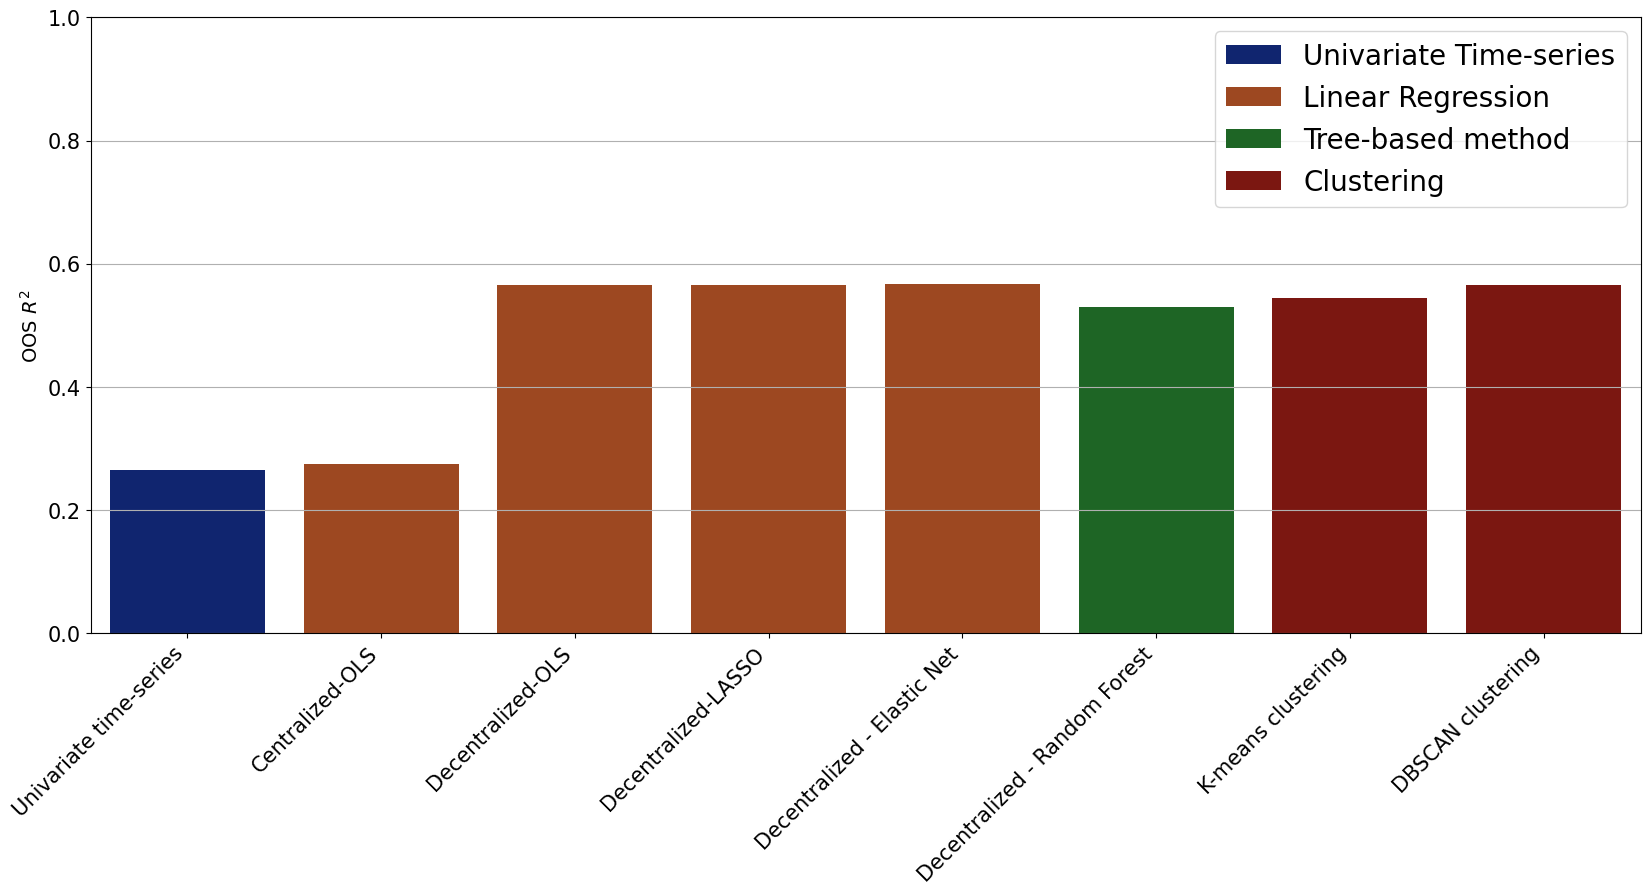

In [54]:
x_pos = np.arange(res.shape[1])

# Build the plot
#plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylim([0,1])
g = sns.barplot(data=results, x='model', y='OOS R2', hue='model-type', ax=ax, dodge=False, palette='dark')
ax.legend(loc = 'upper right')
ax.set_ylabel('OOS $R^2$', size = 14)
ax.set_xlabel('')
ax.set_xticks(x_pos)
ax.set_xticklabels(['Univariate time-series','Centralized-OLS','Decentralized-OLS','Decentralized-LASSO','Decentralized - Elastic Net',
                    'Decentralized - Random Forest',
                    'K-means clustering', 'DBSCAN clustering'],
                   rotation=45,ha='right')
ax.yaxis.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("results_prophet.png",dpi=400, bbox_inches='tight')
plt.show()

## 2) Data Aggregation with Clustering

In [56]:
import pandas as pd
import numpy as np
sales=pd.read_csv('data/data_processed.csv')
sales.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Fonction DAC

In [57]:
from scipy.stats import norm
from sklearn.cluster import KMeans

In [58]:
def DAC(theta = 0.01, 
                    upp = 0.9, 
                    low = 0.1,
                    num_clusters = 9,
                    print_structure = False):
    
    d = len(colnames)
    n = len(skuSet)
    aggre_level = []
    clus_columns = []
    n_cols_alg = 0
    colnames_alg=[]
    z = num_clusters
    all_coeff = np.zeros((n,d))
    all_coeff[0,:] = skuModels[skuSet[0]].params

    for j in range(d): #d=number of features

        # a n-1 vector recording if two betas have the same mean
        test_j = np.zeros(n-1)

        for i in range(1,n): #n=number of features
            sku = skuSet[i]
            all_coeff[i,j] = skuModels[sku].params[j]

            z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) / 
                      np.sqrt(np.square(skuModels[skuSet[0]].bse[j]) + np.square(skuModels[sku].bse[j])) )
            p_value = 1 - norm.cdf(z_stat)
            if p_value >= theta:
                test_j[i-1] = 1

        if print_structure:
            print('Feature:', colnames[j])
            print('Ratio:', np.mean(test_j))

        if np.sum(test_j) >= upp*(n-1):
            aggre_level.append('dept')
            n_cols_alg += 1

        elif np.sum(test_j) <= low*(n-1):
            aggre_level.append('sku')
            n_cols_alg += n

        else:
            aggre_level.append('clus')
            clus_columns.append(j)
            n_cols_alg += z

        if print_structure:
            print(aggre_level[-1])
            print()

    if len(clus_columns) > 0:
        X_clus = all_coeff[:, clus_columns]
        kmeans = KMeans(n_clusters=z, random_state=0).fit(X_clus)

    X_alg_train = np.zeros((train_size, n_cols_alg))
    X_alg_test = np.zeros((test_size, n_cols_alg))

    count = 0
    for i in range(d):

        if aggre_level[i] == 'dept':

            for sku in skuSet:
                # find the corresponding range
                idx_train = range_dict[sku]['train']
                idx_test = range_dict[sku]['test']

                # stack the data
                X_alg_train[idx_train[0]:idx_train[1], count] = X_dict[sku]['train'][:,i]
                X_alg_test[idx_test[0]:idx_test[1], count] = X_dict[sku]['test'][:,i]

            count += 1
            colnames_alg.append(str(colnames[i+3])+'_dept')

        elif aggre_level[i] == 'clus':
            print(colnames[i])
            
            for j in range(z):
                # the indices of items in cluster j
                clus_items = list(np.where(kmeans.labels_ == j)[0])
                print(clus_items)
              
                for idx in clus_items:
                    sku = skuSet[idx]
                    # find the corresponding range
                    idx_train = range_dict[sku]['train']
                    idx_test = range_dict[sku]['test']

                    # stack the data
                    X_alg_train[idx_train[0]:idx_train[1], count] = X_dict[sku]['train'][:,i]
                    X_alg_test[idx_test[0]:idx_test[1], count] = X_dict[sku]['test'][:,i]

                count += 1
                colnames_alg.append(str(colnames[i])+get_str_list(clus_items))

        else:
            for sku in skuSet:
                # find the corresponding range
                idx_train = range_dict[sku]['train']
                idx_test = range_dict[sku]['test']

                # stack the data
                X_alg_train[idx_train[0]:idx_train[1], count] = X_dict[sku]['train'][:,i]
                X_alg_test[idx_test[0]:idx_test[1], count] = X_dict[sku]['test'][:,i]

                count += 1
                colnames_alg.append(str(colnames[i])+'_'+str(sku))
        
    return X_alg_train, X_alg_test, colnames_alg

In [59]:
def get_str_list(L):
  s=''
  for sku in L:
    s+='_'+str(sku)
  return s

### DAC - Linear

In [60]:
sales

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,2018-08-27,44,20.0,53.99,42.38,43.99,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4308,2018-09-03,44,14.0,52.99,53.99,42.38,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4309,2018-09-10,44,22.0,44.99,52.99,53.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4310,2018-09-17,44,28.0,42.99,44.99,52.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
skuSet = list(sales.sku.unique())
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"] ]
for i in skuSet:
  df_i = sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [62]:
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import r2_score

# testing data dictionary
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []


train_size = 0
test_size = 0
range_dict = {}
row_train = 0
row_test = 0

for i in skuSet:

    X_train_i,X_test_i = np.split(skuData[i]["X"], [68])
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68])

    X_dict[i] = {'train': X_train_i, 'test': X_test_i}
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    train_size += y_train_i.size
    test_size += y_test_i.size
    range_dict[i] = {'train': (row_train, row_train + y_train_i.size), 
                     'test':  (row_test, row_test + y_test_i.size) }
    
    row_train += y_train_i.size
    row_test += y_test_i.size
    
    model_i = OLS(y_train_i, X_train_i, hasconst = False)
    skuModels[i] = model_i.fit()
    y_pred += list(skuModels[i].predict(X_test_i))
    y_test += list(y_test_i)
    y_train += list(y_train_i)

y_train = np.array(y_train)
y_test = np.array(y_test)

print('R2:',r2_score(y_test, np.array(y_pred)))

R2: 0.5165391351359223


In [63]:
from sklearn.linear_model import LinearRegression

i=0
params=[]
maximum1=0

for upp in [0.7,0.8,0.9]:
    for low in [0.1,0.2,0.3]:
        for z in [6,7,8]:
          for theta in [0.01,0.05]:
            i+=1
            X_alg_train, X_alg_test, colnames_alg = DAC(upp = upp, low = low, num_clusters = z, theta=theta)
            print('Fitting model',i,'/54')
            model_0 = LinearRegression(fit_intercept=True).fit(X_alg_train, y_train)
            print('  Parameters:', upp, low, z, theta)
            score=r2_score(y_test, model_0.predict(X_alg_test))
            print('  R2 score:', str(score)[:5])
            if score>maximum1:
              params = [upp,low,z,theta]
              maximum1 = score

print('\nBest Model:')
print('Parameters:',params)
print('R2:',str(maximum1)[:5])

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
functionality_04.Selfie sticks
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
color_blue
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
vendor_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
vendor_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
vendor_10
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[22, 28, 29]
[32]
[24]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[14, 35, 39]
feat_main_page
[22, 28, 29]
[32]
[24]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[14, 35, 39]
vendor_10
[22, 28, 29]
[32]
[24]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[14, 35, 39]
Fitting model 2 /54
  Parameters: 0.7 0.1 6 0.05
  R2 score: 0.556


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
functionality_04.Selfie sticks
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
color_blue
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
vendor_6
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
vendor_8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
vendor_10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[35, 39]
[32]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[10]
[22, 28, 29]
[14]
feat_main_page
[35, 39]
[32]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[10]
[22, 28, 29]
[14]
vendor_10
[35, 39]
[32]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[10]
[22, 28, 29]
[14]
Fitting model 4 /54
  Parameters: 0.7 0.1 7 0.05
  R2 score: 0.565


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18]
[32]
[10]
[15, 33, 35]
[29]
[0, 25, 30]
functionality_04.Selfie sticks
[24]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18]
[32]
[10]
[15, 33, 35]
[29]
[0, 25, 30]
color_blue
[24]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18]
[32]
[10]
[15, 33, 35]
[29]
[0, 25, 30]
vendor_6
[24]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18]
[32]
[10]
[15, 33, 35]
[29]
[0, 25, 30]
vendor_8
[24]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18]
[32]
[10]
[15, 33, 35]
[29]
[0, 25, 30]
vendor_10
[24]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[1, 2, 3, 4, 6, 8, 9, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 36, 38, 40, 41, 42, 43]
[32]
[24]
[10]
[22, 28, 29]
[35, 39]
[14]
[0, 5, 7, 11, 12, 13, 16, 20, 25, 27, 37]
feat_main_page
[1, 2, 3, 4, 6, 8, 9, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 36, 38, 40, 41, 42, 43]
[32]
[24]
[10]
[22, 28, 29]
[35, 39]
[14]
[0, 5, 7, 11, 12, 13, 16, 20, 25, 27, 37]
vendor_10
[1, 2, 3, 4, 6, 8, 9, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 36, 38, 40, 41, 42, 43]
[32]
[24]
[10]
[22, 28, 29]
[35, 39]
[14]
[0, 5, 7, 11, 12, 13, 16, 20, 25, 27, 37]
Fitting model 6 /54
  Parameters: 0.7 0.1 8 0.05
  R2 score: 0.564


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14, 29]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]
Fitting model 7 /54
  Parameters: 0.7 0.2 6 0.01
  R2 score: 0.580


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[32]
[24]
[10, 22, 28, 29]
[35, 39]
[14]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[32]
[24]
[10, 22, 28, 29]
[35, 39]
[14]
Fitting model 8 /54
  Parameters: 0.7 0.2 6 0.05
  R2 score: 0.564


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]
[15, 19, 33, 39]
[29]
Fitting model 9 /54
  Parameters: 0.7 0.2 7 0.01
  R2 score: 0.582


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[32]
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[22, 28, 29]
[39]
[14]
feat_main_page
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[32]
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[22, 28, 29]
[39]
[14]
Fitting model 10 /54
  Parameters: 0.7 0.2 7 0.05
  R2 score: 0.564


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[6, 8, 10, 18, 26, 27, 35, 40]
[24]
[14]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[29]
[32]
[0, 11, 12, 13, 16, 22, 25, 28, 30, 34]
Fitting model 11 /54
  Parameters: 0.7 0.2 8 0.01
  R2 score: 0.581


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[32]
[22, 28]
[39]
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[14]
[29]
feat_main_page
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[32]
[22, 28]
[39]
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[14]
[29]
Fitting model 12 /54
  Parameters: 0.7 0.2 8 0.05
  R2 score: 0.571


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14, 29]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]
Fitting model 13 /54
  Parameters: 0.7 0.3 6 0.01
  R2 score: 0.580


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[32]
[24]
[10, 22, 28, 29]
[35, 39]
[14]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43]
[32]
[24]
[10, 22, 28, 29]
[35, 39]
[14]
Fitting model 14 /54
  Parameters: 0.7 0.3 6 0.05
  R2 score: 0.564


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]
[15, 19, 33, 39]
[29]
Fitting model 15 /54
  Parameters: 0.7 0.3 7 0.01
  R2 score: 0.582


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[32]
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[22, 28, 29]
[39]
[14]
feat_main_page
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[32]
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[22, 28, 29]
[39]
[14]
Fitting model 16 /54
  Parameters: 0.7 0.3 7 0.05
  R2 score: 0.564
price
[6, 8, 10, 18, 26, 27, 35, 40]
[24]
[14]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[29]
[32]
[0, 11, 12, 13, 16, 22, 25, 28, 30, 34]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 17 /54
  Parameters: 0.7 0.3 8 0.01
  R2 score: 0.581


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[32]
[22, 28]
[39]
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[14]
[29]
feat_main_page
[24]
[0, 5, 10, 11, 16, 20, 25, 27, 37]
[32]
[22, 28]
[39]
[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 17, 18, 19, 21, 23, 26, 30, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43]
[14]
[29]
Fitting model 18 /54
  Parameters: 0.7 0.3 8 0.05
  R2 score: 0.571


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
functionality_04.Selfie sticks
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
color_blue
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
vendor_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
vendor_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18, 29]
[32]
[15, 33, 35]
[10]
vendor_10
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


vendor_10
[24]
[0, 1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[32]
[6, 14, 19, 33, 35, 39]
[10]
[8, 15]
Fitting model 20 /54
  Parameters: 0.8 0.1 6 0.05
  R2 score: 0.545
price
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
functionality_04.Selfie sticks
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
color_blue
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
vendor_6
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
vendor_8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
vendor_10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 14, 18]
[32]
[10]
[29]
[15, 33, 35]
Fitting model 21 /5

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[8, 15]
[10]
[6, 14, 19, 33, 35, 39]
[11, 22, 28, 29]
feat_main_page
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[8, 15]
[10]
[6, 14, 19, 33, 35, 39]
[11, 22, 28, 29]
month_10
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[8, 15]
[10]
[6, 14, 19, 33, 35, 39]
[11, 22, 28, 29]
vendor_10
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[8, 15]
[10]
[6, 14, 19, 33, 35, 39]
[11, 22, 28, 29]
Fitting model 22 /54
  Parameters: 0.8 0.1 7 0.05
  R2 score: 0.545
price
[24]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 14, 18]
[32]
[10]
[15, 33, 35]
[29]
[0, 25, 30]
functionality_04.Sel

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.8 0.1 8 0.01
  R2 score: 0.567


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35, 39]
[10]
[22, 28, 29]
[8, 15]
[11, 40]
feat_main_page
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35, 39]
[10]
[22, 28, 29]
[8, 15]
[11, 40]
month_10
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35, 39]
[10]
[22, 28, 29]
[8, 15]
[11, 40]
vendor_10
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35, 39]
[10]
[22, 28, 29]
[8, 15]
[11, 40]
Fitting model 24 /54
  Parameters: 0.8 0.1 8 0.05
  R2 score: 0.545
price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14, 29]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 25 /54
  Parameters: 0.8 0.2 6 0.01
  R2 score: 0.580
price
[6, 14, 19, 33, 35, 39]
[24]
[32]
[8, 15]
[10, 11, 22, 28, 29]
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
feat_main_page
[6, 14, 19, 33, 35, 39]
[24]
[32]
[8, 15]
[10, 11, 22, 28, 29]
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
month_10
[6, 14, 19, 33, 35, 39]
[24]
[32]
[8, 15]
[10, 11, 22, 28, 29]
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
Fitting model 26 /54


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.8 0.2 6 0.05
  R2 score: 0.545


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]
[15, 19, 33, 39]
[29]
Fitting model 27 /54
  Parameters: 0.8 0.2 7 0.01
  R2 score: 0.582
price
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[8, 15]
[10, 22, 28, 29]
[6, 14, 33, 35, 39]
[11, 40]
feat_main_page
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[8, 15]
[10, 22, 28, 29]
[6, 14, 33, 35, 39]
[11, 40]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


month_10
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[8, 15]
[10, 22, 28, 29]
[6, 14, 33, 35, 39]
[11, 40]
Fitting model 28 /54
  Parameters: 0.8 0.2 7 0.05
  R2 score: 0.545


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[6, 8, 10, 18, 26, 27, 35, 40]
[24]
[14]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[29]
[32]
[0, 11, 12, 13, 16, 22, 25, 28, 30, 34]
Fitting model 29 /54
  Parameters: 0.8 0.2 8 0.01
  R2 score: 0.581


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35]
[8, 15]
[22, 28, 29]
[11, 40]
[39]
feat_main_page
[0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35]
[8, 15]
[22, 28, 29]
[11, 40]
[39]
month_10
[0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35]
[8, 15]
[22, 28, 29]
[11, 40]
[39]
Fitting model 30 /54
  Parameters: 0.8 0.2 8 0.05
  R2 score: 0.544
price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14, 29]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 31 /54
  Parameters: 0.8 0.3 6 0.01
  R2 score: 0.580
price
[6, 14, 19, 33, 35, 39]
[24]
[32]
[8, 15]
[10, 11, 22, 28, 29]
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
feat_main_page
[6, 14, 19, 33, 35, 39]
[24]
[32]
[8, 15]
[10, 11, 22, 28, 29]
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
month_10
[6, 14, 19, 33, 35, 39]
[24]
[32]
[8, 15]
[10, 11, 22, 28, 29]
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 32 /54
  Parameters: 0.8 0.3 6 0.05
  R2 score: 0.545


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 6, 8, 10, 11, 13, 18, 26, 27, 34, 35, 40]
[24]
[14]
[1, 2, 3, 4, 5, 7, 9, 12, 16, 17, 20, 21, 22, 23, 25, 28, 30, 31, 36, 37, 38, 41, 42, 43]
[32]
[15, 19, 33, 39]
[29]
Fitting model 33 /54
  Parameters: 0.8 0.3 7 0.01
  R2 score: 0.582


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[8, 15]
[10, 22, 28, 29]
[6, 14, 33, 35, 39]
[11, 40]
feat_main_page
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[8, 15]
[10, 22, 28, 29]
[6, 14, 33, 35, 39]
[11, 40]
month_10
[0, 1, 2, 3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[8, 15]
[10, 22, 28, 29]
[6, 14, 33, 35, 39]
[11, 40]
Fitting model 34 /54
  Parameters: 0.8 0.3 7 0.05
  R2 score: 0.545
price
[6, 8, 10, 18, 26, 27, 35, 40]
[24]
[14]
[15, 19, 33, 39]
[1, 2, 3, 4, 5, 7, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[29]
[32]
[0, 11, 12, 13, 16, 22, 25, 28, 30, 34]
Fitting model 35 /54


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.8 0.3 8 0.01
  R2 score: 0.581


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35]
[8, 15]
[22, 28, 29]
[11, 40]
[39]
feat_main_page
[0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35]
[8, 15]
[22, 28, 29]
[11, 40]
[39]
month_10
[0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 16, 17, 18, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[24]
[32]
[6, 14, 19, 33, 35]
[8, 15]
[22, 28, 29]
[11, 40]
[39]
Fitting model 36 /54
  Parameters: 0.8 0.3 8 0.05
  R2 score: 0.544


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[11, 14, 18]
month_5
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[11, 14, 18]
month_8
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[11, 14, 18]
month_10
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[11, 14, 18]
functionality_04.Selfie sticks
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[11, 14, 18]
color_blue
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
price-2
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
feat_main_page
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
trend
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
month_5
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
month_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.9 0.1 7 0.01
  R2 score: 0.512
price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[32]
[14]
[26, 29, 39]
[8]
[33]
price-2
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
[33]
feat_main_page
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
[33]
trend
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
[33]
month_5
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
[33]
month_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[14]
[26, 29, 39]
[8]
[33]
month_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 1

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[11, 14, 18]
[10]
[8, 26, 28, 39]
[15, 33, 35]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[11, 14, 18]
[10]
[8, 26, 28, 39]
[15, 33, 35]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[11, 14, 18]
[10]
[8, 26, 28, 39]
[15, 33, 35]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[11, 14, 18]
[10]
[8, 26, 28, 39]
[15, 33, 35]
functionality_04.Selfie sticks
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[11, 14, 18]
[10]
[8, 26, 28, 39]
[15, 33, 35]
color_blue
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.9 0.1 8 0.05
  R2 score: 0.474
price
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]
month_5
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]
month_8
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]
month_10
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 43 /54
  Parameters: 0.9 0.2 6 0.01
  R2 score: 0.527


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
price-2
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
feat_main_page
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
trend
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
month_5
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
month_6
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
Fitting model 45 /54
  Parameters: 0.9 0.2 7 0.01
  R2 score: 0.525
price
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
price-2
[8, 33, 35]
[24]
[32]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[14]
[26, 29, 39]
month_10
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
month_11
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
month_12
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
functionality_02.Portable smartphone chargers
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
Fitting model 46 /54
  Parameters: 0.9 0.2 7 0.05
  R2 score: 0.475
price
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[8, 15]
month_5
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[29]
[14]
[26, 28, 39]
[8, 15]
month_8
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[29]
[14]
[26, 28, 39]
[8, 15]
month_10
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[29]
[14]
[26, 28, 39]
[8, 15]
Fitting model 47 /54
  Parameters: 0.9 0.2 8 0.01
  R2 score: 0.525


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
month_6
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]
month_5
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]
month_8
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]
month_10
[8, 15, 26, 39]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[32]
[29]
[14]
Fitting model 49 /54
  Parameters: 0.9 0.3 6 0.01
  R2 score: 0.527


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
price-2
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
feat_main_page
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
trend
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
month_5
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[14]
[26, 29, 39]
month_6
[8]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
[24]
[32]
[29]
[14]
[8, 15]
[26, 28, 39]
Fitting model 51 /54
  Parameters: 0.9 0.3 7 0.01
  R2 score: 0.525
price
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
price-2
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


month_8
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
month_9
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
month_10
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
month_11
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
month_12
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 36, 37, 38, 41, 42, 43]
[14]
[26, 29, 39]
functionality_02.Portable smartphone chargers
[8, 33, 35]
[24]
[32]
[11, 22, 40]
[0, 1, 2, 3

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[29]
[14]
[26, 28, 39]
[8, 15]
month_5
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[29]
[14]
[26, 28, 39]
[8, 15]
month_8
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[29]
[14]
[26, 28, 39]
[8, 15]
month_10
[6, 13, 18, 19, 27, 33, 35]
[24]
[32]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 16, 17, 20, 21, 22, 23, 25, 30, 31, 34, 36, 37, 38, 40, 41, 42, 43]
[29]
[14]
[26, 28, 39]
[8, 15]
Fitting model 53 /54
  Parameters: 0.9 0.3 8 0.01
  R2 score: 0.525
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
month_6
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 28, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43]
[24]
[32]
[26, 29, 39]
[14]
[33]
[8]
[11, 22, 40]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 9,

In [64]:
X_alg_train, X_alg_test, colnames_alg = DAC(upp = 0.7, low = 0.2, num_clusters = 8, theta=0.01, print_structure=True)
print('Fitting model',i,'/54')
model_0 = LinearRegression(fit_intercept=True).fit(X_alg_train, y_train)
score=r2_score(y_test, model_0.predict(X_alg_test))
print('  R2 score:', str(score)[:5])

Feature: price
Ratio: 0.5581395348837209
clus

Feature: price-1
Ratio: 0.9302325581395349
dept

Feature: price-2
Ratio: 0.9069767441860465
dept

Feature: feat_main_page
Ratio: 0.9534883720930233
dept

Feature: trend
Ratio: 0.9069767441860465
dept

Feature: month_2
Ratio: 1.0
dept

Feature: month_3
Ratio: 0.9767441860465116
dept

Feature: month_4
Ratio: 0.9302325581395349
dept

Feature: month_5
Ratio: 0.8604651162790697
dept

Feature: month_6
Ratio: 0.9069767441860465
dept

Feature: month_7
Ratio: 0.9069767441860465
dept

Feature: month_8
Ratio: 0.8837209302325582
dept

Feature: month_9
Ratio: 0.9534883720930233
dept

Feature: month_10
Ratio: 0.8837209302325582
dept

Feature: month_11
Ratio: 0.9302325581395349
dept

Feature: month_12
Ratio: 0.9534883720930233
dept

Feature: functionality_02.Portable smartphone chargers
Ratio: 0.9069767441860465
dept

Feature: functionality_03.Bluetooth speakers
Ratio: 0.023255813953488372
sku

Feature: functionality_04.Selfie sticks
Ratio: 0.11627906976

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  R2 score: 0.581


In [65]:
import time

In [66]:
z = 7
upp, low = 0.7, 0.2
theta=0.01
tZero=time.time()
X_alg_train, X_alg_test, colnames_alg = DAC(upp = upp, low = low, 
                                          num_clusters = z, theta=theta,
                                          print_structure = True)

print('Fitting model...')
model_0 = LinearRegression().fit(X_alg_train, y_train)
print('Parameters:', upp, low, z, theta) 
print('R2 score:', r2_score(y_test, model_0.predict(X_alg_test)))
t = time.time()-tZero
print("time to compute",t)

Feature: price
Ratio: 0.5581395348837209
clus

Feature: price-1
Ratio: 0.9302325581395349
dept

Feature: price-2
Ratio: 0.9069767441860465
dept

Feature: feat_main_page
Ratio: 0.9534883720930233
dept

Feature: trend
Ratio: 0.9069767441860465
dept

Feature: month_2
Ratio: 1.0
dept

Feature: month_3
Ratio: 0.9767441860465116
dept

Feature: month_4
Ratio: 0.9302325581395349
dept

Feature: month_5
Ratio: 0.8604651162790697
dept

Feature: month_6
Ratio: 0.9069767441860465
dept

Feature: month_7
Ratio: 0.9069767441860465
dept

Feature: month_8
Ratio: 0.8837209302325582
dept

Feature: month_9
Ratio: 0.9534883720930233
dept

Feature: month_10
Ratio: 0.8837209302325582
dept

Feature: month_11
Ratio: 0.9302325581395349
dept

Feature: month_12
Ratio: 0.9534883720930233
dept

Feature: functionality_02.Portable smartphone chargers
Ratio: 0.9069767441860465
dept

Feature: functionality_03.Bluetooth speakers
Ratio: 0.023255813953488372
sku

Feature: functionality_04.Selfie sticks
Ratio: 0.11627906976

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Parameters: 0.7 0.2 7 0.01
R2 score: 0.5822936305519328
time to compute 0.5361993312835693


### DAC - Log-linear

In [67]:
sales['price']=np.log(sales['price'])
sales['price-1']=np.log(sales['price-1'])
sales['price-2']=np.log(sales['price-2'])
sales.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,2.326302,2.288486,2.318458,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,2.112635,2.326302,2.288486,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,2.178155,2.112635,2.326302,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,2.195000,2.178155,2.112635,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,2.341806,2.195000,2.178155,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
skuSet = list(sales.sku.unique())
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"] ]
for i in skuSet:
  df_i = sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [69]:
# testing data dictionary
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []


train_size = 0
test_size = 0
range_dict = {}
row_train = 0
row_test = 0

for i in skuSet:

    X_train_i,X_test_i = np.split(skuData[i]["X"], [68])
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68])

    X_dict[i] = {'train': X_train_i, 'test': X_test_i}
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    train_size += y_train_i.size
    test_size += y_test_i.size
    range_dict[i] = {'train': (row_train, row_train + y_train_i.size), 
                     'test':  (row_test, row_test + y_test_i.size) }
    
    row_train += y_train_i.size
    row_test += y_test_i.size
    
    model_i = OLS(y_train_i, X_train_i, hasconst = False)
    skuModels[i] = model_i.fit()
    y_pred += list(skuModels[i].predict(X_test_i))
    y_test += list(y_test_i)
    y_train += list(y_train_i)

y_train = np.array(y_train)
y_test = np.array(y_test)

print('R2:',r2_score(y_test, np.array(y_pred)))

R2: 0.5582974234029211


In [70]:
i=0
params=[]
maximum1=0

for upp in [0.7,0.8,0.9]:
    for low in [0.1,0.2,0.3]:
        for z in [7,8,9]:
          for theta in [0.01,0.05,0.1]:
            i+=1
            X_alg_train, X_alg_test, colnames_alg = DAC(upp = upp, low = low, num_clusters = z, theta=theta)
            print('Fitting model',i,'/81')
            model_0 = LinearRegression().fit(X_alg_train, y_train)
            print('  Parameters:', upp, low, z)
            score=r2_score(y_test, model_0.predict(X_alg_test))
            print('  R2 score:', score)
            if score>maximum1:
              params = [upp,low,z,theta]
              maximum1 = score

print('\nBest Model:')
print('Parameters:',params)
print('R2:',maximum1)  

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
functionality_04.Selfie sticks
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
functionality_09.Smartphone stands
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
color_blue
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
vendor_6
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
vendor_8
[11, 18]
[8, 15]
[24]
[14, 29]
[0,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[10]
[15, 18, 33, 35]
[8, 32]
[11, 19, 28]
vendor_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14, 29]
[10]
[15, 18, 33, 35]
[8, 32]
[11, 19, 28]
Fitting model 2 /81
  Parameters: 0.7 0.1 7
  R2 score: 0.5987902810568444
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[8, 11, 15, 18, 33, 35]
[10]
[29]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[8, 11, 15, 18, 33, 35]
[10]
[29]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[8, 11, 15, 18, 33, 35]
[10]
[29]
vendor_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[8

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.7 0.1 7
  R2 score: 0.6036205053860619


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
functionality_04.Selfie sticks
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
functionality_09.Smartphone stands
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
color_blue
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
vendor_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
vendor_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[11, 19, 28]
[7, 12, 13]
vendor_10
[15, 18, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 9, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[14, 29]
[10]
[8, 32]
[11, 19, 28]
[7, 12, 13]
Fitting model 5 /81
  Parameters: 0.7 0.1 8
  R2 score: 0.6087986812243916
price
[8, 18, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[29]
[10]
[14]
[32]
[11, 15, 28]
price-2
[8, 18, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[10]
[14]
[32]
[11, 15, 28]
feat_main_page
[8, 18, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[10]
[14]
[32]
[11, 15, 28]
vendor_10
[8, 18, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[10]
[14]
[32]
[11, 15, 28]
Fitting model 6 /81
  Parameters: 0.7 0.1 8
  R2 score: 0.6000599352797631


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
functionality_04.Selfie sticks
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
functionality_09.Smartphone stands
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
color_blue
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
vendor_6
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
vendor_8
[14, 29]
[28]
[24]
[33, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.7 0.1 9
  R2 score: 0.6107524259152073


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[11, 26, 28]
[29]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
price-2
[24]
[11, 26, 28]
[29]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
feat_main_page
[24]
[11, 26, 28]
[29]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
vendor_10
[24]
[11, 26, 28]
[29]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
Fitting model 9 /81
  Parameters: 0.7 0.1 9
  R2 score: 0.6080454351664788


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[14, 29]
[15, 18, 33, 35]
[8, 32]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
Fitting model 10 /81
  Parameters: 0.7 0.2 7
  R2 score: 0.6111400973541345
price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[14, 29]
[15, 18, 33, 35]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[8, 32]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
Fitting model 11 /81
  Parameters: 0.7 0.2 7
  R2 score: 0.6111400973541345


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[11, 15, 28]
[24]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[8, 18, 33, 35]
price-2
[11, 15, 28]
[24]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[8, 18, 33, 35]
feat_main_page
[11, 15, 28]
[24]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[8, 18, 33, 35]
Fitting model 12 /81
  Parameters: 0.7 0.2 7
  R2 score: 0.6013808794836099
price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[15, 18, 33, 35]
[14, 29]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
[8]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 13 /81
  Parameters: 0.7 0.2 8
  R2 score: 0.6111349662032164


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[15, 18, 33, 35]
[14, 29]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
[8]
Fitting model 14 /81
  Parameters: 0.7 0.2 8
  R2 score: 0.6111349662032164
price
[24]
[10, 11, 26, 28]
[29]
[8, 18, 33, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[15]
price-2
[24]
[10, 11, 26, 28]
[29]
[8, 18, 33, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[15]
feat_main_page
[24]
[10, 11, 26, 28]
[29]
[8, 18, 33, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[15]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 15 /81
  Parameters: 0.7 0.2 8
  R2 score: 0.6068668337314975
price
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[24]
[14, 29]
[8]
[10, 11]
[15, 18, 33, 35]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[19, 28]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 16 /81
  Parameters: 0.7 0.2 9
  R2 score: 0.6111992955603989
price
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[24]
[14, 29]
[8]
[10, 11]
[15, 18, 33, 35]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[19, 28]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 17 /81
  Parameters: 0.7 0.2 9
  R2 score: 0.6111992955603989
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[10, 11, 19, 28]
[14]
[8]
[15]
[18, 33, 35]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[10, 11, 19, 28]
[14]
[8]
[15]
[18, 33, 35]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[10, 11, 19, 28]
[14]
[8]
[15]
[18, 33, 35]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 18 /81
  Parameters: 0.7 0.2 9
  R2 score: 0.5994862303147754
price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[14, 29]
[15, 18, 33, 35]
[8, 32]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
Fitting model 19 /81
  Parameters: 0.7 0.3 7
  R2 score: 0.6111400973541345
price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[14, 29]
[15, 18, 33, 35]
[8, 32]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
Fitting model 20 /81


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.7 0.3 7
  R2 score: 0.6111400973541345


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[11, 15, 28]
[24]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[8, 18, 33, 35]
price-2
[11, 15, 28]
[24]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[8, 18, 33, 35]
feat_main_page
[11, 15, 28]
[24]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[8, 18, 33, 35]
Fitting model 21 /81
  Parameters: 0.7 0.3 7
  R2 score: 0.6013808794836099


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[15, 18, 33, 35]
[14, 29]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
[8]
Fitting model 22 /81
  Parameters: 0.7 0.3 8
  R2 score: 0.6111349662032164


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[15, 18, 33, 35]
[14, 29]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
[8]
Fitting model 23 /81
  Parameters: 0.7 0.3 8
  R2 score: 0.6111349662032164
price
[24]
[10, 11, 26, 28]
[29]
[8, 18, 33, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[15]
price-2
[24]
[10, 11, 26, 28]
[29]
[8, 18, 33, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[15]
feat_main_page
[24]
[10, 11, 26, 28]
[29]
[8, 18, 33, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[15]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 24 /81
  Parameters: 0.7 0.3 8
  R2 score: 0.6068668337314975
price
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[24]
[14, 29]
[8]
[10, 11]
[15, 18, 33, 35]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[32]
[19, 28]
Fitting model 25 /81
  Parameters: 0.7 0.3 9
  R2 score: 0.6111992955603989


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[24]
[14, 29]
[8]
[10, 11]
[15, 18, 33, 35]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[19, 28]
Fitting model 26 /81
  Parameters: 0.7 0.3 9
  R2 score: 0.6111992955603989
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[10, 11, 19, 28]
[14]
[8]
[15]
[18, 33, 35]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[10, 11, 19, 28]
[14]
[8]
[15]
[18, 33, 35]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[10, 11, 19, 28]
[14]
[8]
[15]
[18, 33, 35]
Fitting model 27 /81


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.7 0.3 9
  R2 score: 0.5994862303147754


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
functionality_04.Selfie sticks
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
functionality_09.Smartphone stands
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
color_blue
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
vendor_6
[11, 18]
[8, 15]
[24]
[14, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32, 33, 35]
[10]
vendor_8
[11, 18]
[8, 15]
[24]
[14, 29]
[0,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.8 0.1 7
  R2 score: 0.6012496448589931


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[8, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[10]
[29]
price-1
[8, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[10]
[29]
price-2
[8, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[10]
[29]
feat_main_page
[8, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[10]
[29]
trend
[8, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[14]
[10]
[29]
month_5
[8, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[14, 29]
[33, 35]
[32]
[10]
[8, 15]
color_blue
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
vendor_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
vendor_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
vendor_10
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[33, 35]
[32]
[10]
[8, 15]
Fitting model 31 /81
  Parameters: 0.8 0.1 8
  R2 score: 0.6113084101671615
price
[8, 18, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


vendor_10
[8, 18, 33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[14]
[10]
[29]
[32]
[15]
Fitting model 32 /81
  Parameters: 0.8 0.1 8
  R2 score: 0.6021453085488895
price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 15, 18]
[14]
[10]
price-1
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 15, 18]
[14]
[10]
price-2
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 15, 18]
[14]
[10]
feat_main_page
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 15, 18]
[14]
[10]
trend
[

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


vendor_10
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 15, 18]
[14]
[10]
Fitting model 33 /81
  Parameters: 0.8 0.1 8
  R2 score: 0.5567636362789529


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
functionality_04.Selfie sticks
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
functionality_09.Smartphone stands
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
color_blue
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
vendor_6
[14, 29]
[28]
[24]
[33, 35]
[11, 18]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[8, 15]
vendor_8
[14, 29]
[28]
[24]
[33, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[14]
[32]
[15]
price-2
[24]
[11, 26, 28]
[29]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[14]
[32]
[15]
month_10
[24]
[11, 26, 28]
[29]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[14]
[32]
[15]
vendor_10
[24]
[11, 26, 28]
[29]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[14]
[32]
[15]
Fitting model 35 /81
  Parameters: 0.8 0.1 9
  R2 score: 0.6055777822910526


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 15]
[32]
[10]
[14]
[33, 35]
[8]
price-1
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 15]
[32]
[10]
[14]
[33, 35]
[8]
price-2
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 15]
[32]
[10]
[14]
[33, 35]
[8]
feat_main_page
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 15]
[32]
[10]
[14]
[33, 35]
[8]
trend
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 15]
[32]
[10]
[14]
[33, 35]
[8]
month_5
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 37 /81
  Parameters: 0.8 0.2 7
  R2 score: 0.6111400973541345


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[11, 15, 28]
[14]
[8, 18, 33, 35]
[32]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[11, 15, 28]
[14]
[8, 18, 33, 35]
[32]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[11, 15, 28]
[14]
[8, 18, 33, 35]
[32]
Fitting model 38 /81
  Parameters: 0.8 0.2 7
  R2 score: 0.5991129115931446


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.8 0.2 8
  R2 score: 0.6111349662032164
price
[24]
[10, 11, 26, 28]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
price-2
[24]
[10, 11, 26, 28]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
month_10
[24]
[10, 11, 26, 28]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 41 /81
  Parameters: 0.8 0.2 8
  R2 score: 0.60361476464379


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
price-1
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
price-2
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
feat_main_page
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
trend
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
month_5
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.8 0.2 9
  R2 score: 0.6111992955603989
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[29]
[8]
[14]
[32]
[10, 18, 19, 33, 35]
[15]
[11, 26, 28]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[8]
[14]
[32]
[10, 18, 19, 33, 35]
[15]
[11, 26, 28]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[8]
[14]
[32]
[10, 18, 19, 33, 35]
[15]
[11, 26, 28]
Fitting model 44 /81
  Parameters: 0.8 0.2 9
  R2 score: 0.6052855428388613
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[24]
[14]
[32]
[33, 35]
[8]
[15]
[10, 11, 18, 19]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[24]
[14]
[32]
[33, 35]
[8]
[15]
[10, 11, 18, 19]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.8 0.2 9
  R2 score: 0.5533015591899821
price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[14, 29]
[15, 18, 33, 35]
[8, 32]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[10, 11, 19, 28]
Fitting model 46 /81
  Parameters: 0.8 0.3 7
  R2 score: 0.6111400973541345


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[11, 15, 28]
[14]
[8, 18, 33, 35]
[32]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[11, 15, 28]
[14]
[8, 18, 33, 35]
[32]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[11, 15, 28]
[14]
[8, 18, 33, 35]
[32]
Fitting model 47 /81
  Parameters: 0.8 0.3 7
  R2 score: 0.5991129115931446
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 10, 11, 15, 18]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 6, 7, 12, 13, 16, 22, 25, 26, 27, 30, 34, 39, 40]
[32]
[15, 18, 33, 35]
[14, 29]
[1, 2, 3, 4, 5, 9, 17, 20, 21, 23, 31, 36, 37, 38, 41, 42, 43]
[10, 11, 19, 28]
[8]
Fitting model 49 /81
  Parameters: 0.8 0.3 8
  R2 score: 0.6111349662032164


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[10, 11, 26, 28]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
price-2
[24]
[10, 11, 26, 28]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
month_10
[24]
[10, 11, 26, 28]
[29]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[8, 18, 33, 35]
[32]
[14]
[15]
Fitting model 50 /81
  Parameters: 0.8 0.3 8
  R2 score: 0.60361476464379


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
price-1
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
price-2
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
feat_main_page
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
trend
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[32]
[29]
[14]
[8]
[33, 35]
month_5
[10, 11, 15, 18]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 52 /81
  Parameters: 0.8 0.3 9
  R2 score: 0.6111992955603989
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[8]
[14]
[32]
[10, 18, 19, 33, 35]
[15]
[11, 26, 28]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[8]
[14]
[32]
[10, 18, 19, 33, 35]
[15]
[11, 26, 28]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[8]
[14]
[32]
[10, 18, 19, 33, 35]
[15]
[11, 26, 28]
Fitting model 53 /81
  Parameters: 0.8 0.3 9
  R2 score: 0.6052855428388613


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[24]
[14]
[32]
[33, 35]
[8]
[15]
[10, 11, 18, 19]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[24]
[14]
[32]
[33, 35]
[8]
[15]
[10, 11, 18, 19]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[24]
[14]
[32]
[33, 35]
[8]
[15]
[10, 11, 18, 19]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[24]
[14]
[32]
[33, 35]
[8]
[15]
[10, 11, 18, 19]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[24]
[14]
[32]
[33, 35]
[8]
[15]
[10, 11, 18, 19]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


vendor_6
[33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[32]
[10]
vendor_8
[33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[32]
[10]
vendor_10
[33, 35]
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[11, 18]
[14, 29]
[32]
[10]
Fitting model 55 /81
  Parameters: 0.9 0.1 7
  R2 score: 0.5988878877210491


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[8, 33, 35]
[10]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[8, 33, 35]
[10]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[8, 33, 35]
[10]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[8, 33, 35]
[10]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[8, 33, 35]
[10]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.9 0.1 7
  R2 score: 0.5737760264467756


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 18]
[33, 35]
[32]
[14]
[10]
[29]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 18]
[33, 35]
[32]
[14]
[10]
[29]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 18]
[33, 35]
[32]
[14]
[10]
[29]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 18]
[33, 35]
[32]
[14]
[10]
[29]
month_6
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[11, 18]
[33, 35]
[32]
[14]
[10]
[29]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


vendor_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[10]
[32]
[8]
[29]
[33, 35]
Fitting model 59 /81
  Parameters: 0.9 0.1 8
  R2 score: 0.5606458983745091
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[10]
[33, 35]
[8]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[10]
[33, 35]
[8]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[10]
[33, 35]
[8]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[10]
[33, 35]
[8]
trend
[

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[14]
[32]
[29]
[10]
[33, 35]
[8]
functionality_02.Portable smartphone chargers
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[10]
[33, 35]
[8]
vendor_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[10]
[33, 35]
[8]
Fitting model 60 /81
  Parameters: 0.9 0.1 8
  R2 score: 0.5714506651325735


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[8, 15]
[24]
[29]
[32]
[11, 18]
[14]
[33, 35]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
price-1
[8, 15]
[24]
[29]
[32]
[11, 18]
[14]
[33, 35]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
price-2
[8, 15]
[24]
[29]
[32]
[11, 18]
[14]
[33, 35]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
month_5
[8, 15]
[24]
[29]
[32]
[11, 18]
[14]
[33, 35]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
month_6
[8, 15]
[24]
[29]
[32]
[11, 18]
[14]
[33, 35]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
month_8
[8, 15]
[24]
[29]
[32]
[11, 18]
[14]
[33, 35]
[10]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[29]
[32]
[33, 35]
[10]
[14]
[8]
[11, 15, 22, 28, 40]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 41, 42, 43]
[24]
[29]
[32]
[33, 35]
[10]
[14]
[8]
[11, 15, 22, 28, 40]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 41, 42, 43]
[24]
[29]
[32]
[33, 35]
[10]
[14]
[8]
[11, 15, 22, 28, 40]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 41, 42, 43]
[24]
[29]
[32]
[33, 35]
[10]
[14]
[8]
[11, 15, 22, 28, 40]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 41, 42, 43]
[24]
[29]
[32]
[33, 35]
[10]
[14]
[8]
[11, 15, 22, 28, 40]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 41, 42, 43]
[24]
[29]
[32]
[33, 35]
[10]
[14]
[8]
[11, 15, 22, 28, 40]
month_5
[0, 1, 2, 3, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[14]
[8]
[10]
vendor_10
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[11, 15, 18]
[14]
[8]
[10]
Fitting model 63 /81
  Parameters: 0.9 0.1 9
  R2 score: 0.5705872164231334
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
month_6
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
functionality_02.Portable smartphone chargers
[0, 1, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 65 /81
  Parameters: 0.9 0.2 7
  R2 score: 0.5606361492221708
price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
month_3
[0, 1, 2

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fitting model 66 /81
  Parameters: 0.9 0.2 7
  R2 score: 0.571274971723221


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
price-1
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
price-2
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
month_5
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
month_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
month_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Parameters: 0.9 0.2 8
  R2 score: 0.5586249302296158


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
price-1
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
price-2
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
month_5
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
month_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
month_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
month_10
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_6
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[11, 15]
[22]
month_12
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
functionality_02.Portable smartphone chargers
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
Fitting model 72 /81
  Parameters: 0.9 0.2 9
  R2 score: 0.5681947222858881


C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
month_5
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
month_6
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[33, 35]
[29]
[8, 15, 18]
month_8
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 3

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[33, 35]
[8]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[33, 35]
[8]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[33, 35]
[8]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[33, 35]
[8]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[32]
[29]
[33, 35]
[8]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[32]
[14]
[8]
[33, 35]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
price-1
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
price-2
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
month_5
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
month_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
month_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[14]
[33, 35]
[32]
[8]
[11, 15]
[29]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26,

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
price-1
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
price-2
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
month_5
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
month_6
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26, 27, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[29]
[32]
[33, 35]
[8, 18]
[14]
[15]
[22, 28]
month_8
[24]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 23, 25, 26

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[11, 15]
[22]
month_9
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_11
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_12
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
functionality_02.Portable smartphone chargers
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
Fitting model 80 /81
  Paramet

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
price-1
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
feat_main_page
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
trend
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_3
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[32]
[29]
[33, 35]
[8]
[14]
[11, 15]
[22]
month_4
[0, 1, 2, 3, 4, 5, 6, 7, 

In [71]:
z = 7
upp, low = 0.8, 0.1
theta=0.05
X_alg_train, X_alg_test, colnames_alg = DAC(upp = upp, low = low, 
                                          num_clusters = z, theta=theta,
                                          print_structure = False)
# When print structure use seed = 2
print('Fitting model...')

model_0 = LinearRegression().fit(X_alg_train, y_train)
print('Parameters:', upp, low, z, theta) 
print('R2 score:', r2_score(y_test, model_0.predict(X_alg_test)))

C:\Users\User\AppData\Local\Temp\ipykernel_10216\2996732500.py:26: RuntimeWarning: invalid value encountered in double_scalars
  z_stat = ( np.abs(skuModels[skuSet[0]].params[j] - skuModels[sku].params[j]) /
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


price
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[10]
[14]
[8, 15, 18, 33, 35]
[32]
price-2
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[10]
[14]
[8, 15, 18, 33, 35]
[32]
month_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[10]
[14]
[8, 15, 18, 33, 35]
[32]
vendor_10
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43]
[24]
[29]
[10]
[14]
[8, 15, 18, 33, 35]
[32]
Fitting model...
Parameters: 0.8 0.1 7 0.05
R2 score: 0.6012496448589931


In [72]:
res['DAC_log_lin']=[r2_score(y_test, model_0.predict(X_alg_test))]
res

,univariate,centralized,decentralized,decentralized_lasso,decentralized_elasticnet,decentralized-RF,K-means,DBSCAN,DAC_log_lin
0,0.265395,0.274786,0.565798,0.566411,0.567848,0.530509,0.545031,0.565318,0.60125
